Fonte:http://arquivos.prf.gov.br/arquivos/index.php/s/vw74viLA7WuZI4H/download

## Acidentes nas Rodovias Federais do Brasil no Ano de 2019¶


In [1]:
# Importando as bibliotecas:
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sweetviz as sv
import math
%matplotlib inline
import sys
import os
from scipy.stats import mode
from datetime import datetime, date, time
import warnings
warnings.filterwarnings('ignore')


'{sys.executable}' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
# Leitura da Base de Dados
# Criando Dataframe
# convertando automaticamente a coluna data_inversa para datetime
dados = pd.read_csv("C:/Dataset/acidentes2019.csv", sep=';',encoding='latin-1', parse_dates=['data_inversa'])

# Mostrar todas as colunas da base:
pd.set_option('display.max_columns', None)

# Primeiras linhas do DataFrame:
dados.head(10)

id     pesid data_inversa   dia_semana   horario  uf     br     km  \
0  182256.0  403856.0   2019-01-01  terça-feira  04:00:00  CE  116.0  136,9   
1  182263.0  402859.0   2019-01-01  terça-feira  05:00:00  MT  158.0  599,5   
2  182277.0  402850.0   2019-01-01  terça-feira  10:00:00  PA   10.0     34   
3  182289.0  402431.0   2019-01-01  terça-feira  08:30:00  BA  101.0     13   
4  182307.0  402642.0   2019-01-01  terça-feira  13:50:00  BA  116.0    440   
5  182307.0  402638.0   2019-01-01  terça-feira  13:50:00  BA  116.0    440   
6  182316.0  402361.0   2019-01-01  terça-feira  15:15:00  RS  101.0      8   
7  182334.0  402401.0   2019-01-01  terça-feira  14:45:00  SE  101.0   76,7   
8  182361.0  402521.0   2019-01-01  terça-feira  10:00:00  MG  251.0    280   
9  182362.0  404322.0   2019-01-01  terça-feira  18:20:00  PE  101.0     41   

          municipio               causa_acidente              tipo_acidente  \
0            RUSSAS             Animais na Pista    Atropelamento de Animal   
1          AGUA BOA  Defeito Mecânico no Veículo                   Incêndio   
2        DOM ELISEU      Velocidade Incompatível           Colisão traseira   
3          RIO REAL           Ingestão de Álcool           Colisão traseira   
4  FEIRA DE SANTANA           Ingestão de Álcool  Saída de leito carroçável   
5  FEIRA DE SANTANA           Ingestão de Álcool  Saída de leito carroçável   
6            TORRES  Falta de Atenção à Condução                 Tombamento   
7            MARUIM  Falta de Atenção à Condução  Saída de leito carroçável   
8           SALINAS       Ultrapassagem Indevida  Saída de leito carroçável   
9          IGARASSU           Ingestão de Álcool            Colisão lateral   

  classificacao_acidente     fase_dia  sentido_via condicao_metereologica  \
0            Sem Vítimas    Amanhecer  Decrescente                  Vento   
1            Sem Vítimas    Amanhecer  Decrescente         Garoa/Chuvisco   
2            Sem Vítimas    Pleno dia  Decrescente                Nublado   
3    Com Vítimas Feridas    Pleno dia  Decrescente              Céu Claro   
4    Com Vítimas Feridas    Pleno dia  Decrescente              Céu Claro   
5    Com Vítimas Feridas    Pleno dia  Decrescente              Céu Claro   
6            Sem Vítimas    Pleno dia    Crescente              Céu Claro   
7    Com Vítimas Feridas    Pleno dia    Crescente                    Sol   
8    Com Vítimas Feridas    Pleno dia  Decrescente                    Sol   
9            Sem Vítimas  Plena Noite    Crescente              Céu Claro   

  tipo_pista        tracado_via uso_solo  id_veiculo     tipo_veiculo  \
0    Simples              Curva      Não      324937         Caminhão   
1    Simples               Reta      Não      324940         Caminhão   
2    Simples      Não Informado      Não      324958  Caminhão-trator   
3      Dupla  Desvio Temporário      Não      324987  Caminhão-trator   
4      Dupla              Curva      Não      325030  Caminhão-trator   
5      Dupla              Curva      Não      325030  Caminhão-trator   
6      Dupla               Reta      Sim      325039  Caminhão-trator   
7    Simples               Reta      Não      325068         Caminhão   
8    Simples               Reta      Não      325052  Caminhão-trator   
9      Dupla               Reta      Sim      325208         Caminhão   

                      marca  ano_fabricacao_veiculo tipo_envolvido  \
0  I/MB 15SPRINT RONTAN AMB                  2012.0       Condutor   
1          FORD/CARGO 815 N                  2011.0       Condutor   
2         VOLVO/FH 540 6X4T                  2012.0       Condutor   
3         SCANIA/R 440 A6X2                  2018.0       Condutor   
4       VOLVO/FH12 380 4X2T                  2003.0     Passageiro   
5       VOLVO/FH12 380 4X2T                  2003.0       Condutor   
6   SCANIA/R124 GA6X4NZ 420                  2004.0       Condutor   
7       IVECO/TECTOR 240E25                  2010.0      

In [3]:
# Especificando o cabeçalho do arquivo
#dados= pd.read_csv("C:/Dataset/acidentes2019.csv", sep=';',encoding='latin-1',header=1)

In [4]:
# Selecionando somente alguma colunas
#dados = pd.read_csv("C:/Dataset/acidentes2019.csv", sep=';',encoding='latin-1',usecols=["dia_semana","horario","causa_acidente","sexo"])

In [5]:
# lendo as 5 primeiras linha do arquivo
#dados = pd.read_csv("C:/Dataset/acidentes2019.csv", sep=';',encoding='latin-1', parse_dates=['data_inversa'],nrows=5)

In [6]:
#Definir em quantas linhas cada bloco ira conter - caso o arquivo seja muito grande
# ler as primeiras 10000 por vez
#chunk = pd.read_csv("C:/Dataset/acidentes2019.csv", sep=';',encoding='latin-1', parse_dates=['data_inversa'],chunksize=10000)

In [7]:
# Lendo X linha do arquivo
#dados = pd.read_csv("C:/Dataset/acidentes2019.csv", sep=';',encoding='latin-1',usecols=["causa_acidente","sexo"], nrows=200)

In [8]:
# Indexado a coluna na qual o dataframe sera indexado - index_col
#dados= pd.read_csv("C:/Dataset/acidentes2019.csv", sep=';',encoding='latin-1',index_col='data_inversa')

In [9]:
# ler as colunas especificas
#dados = pd.read_csv("C:/Dataset/acidentes2019.csv", sep=';',encoding='latin-1',usecols=['id',
# 'pesid',
# 'data_inversa',
# 'dia_semana',
 #'horario',
 #'uf',
 #'br',
 #'km',
 #'municipio'])

In [10]:
# ler arquivos por posições
#dados = pd.read_csv("C:/Dataset/acidentes2019.csv", sep=';',encoding='latin-1',usecols=[0,1,2,3,4,5])

In [11]:
#covertando colunas em tempo leitura
#dados = pd.read_csv("C:/Dataset/acidentes2019.csv", sep=';',encoding='latin-1',=dtype{"sexo" : "category"} ,parse_dates=['data_inversa'])

In [12]:
my_report = sv.analyze(dados) # cria o reporte e chama de my_report
my_report.show_html()

# sv.anlyze(dados).show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:17  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   02:07  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [13]:
import pandas_profiling

In [14]:
# Relatorio visual das colunas do dataframe
pandas_profiling.ProfileReport(dados,  title = "Relatório de criação de perfil do Pandas")

In [15]:
profile =pandas_profiling.ProfileReport(dados)

In [16]:
profile.to_file("report.html")

In [17]:
# Número de linhas e coluna:
dados.shape

(162273, 35)

In [18]:
# Últimas linhas do Dataframe:
dados.tail(5)

id     pesid data_inversa     dia_semana   horario  uf     br  \
162268  266406.0  593902.0   2019-11-25  segunda-feira  07:20:00  PR  116.0   
162269  266434.0  593948.0   2019-06-03  segunda-feira  19:00:00  CE  222.0   
162270  266434.0  593947.0   2019-06-03  segunda-feira  19:00:00  CE  222.0   
162271  266573.0  594270.0   2019-07-13         sábado  19:35:00  PR  373.0   
162272  266627.0  594393.0   2019-10-22    terça-feira  20:20:00  BA  324.0   

         km           municipio                      causa_acidente  \
162268  125  FAZENDA RIO GRANDE         Falta de Atenção à Condução   
162269  1,4             CAUCAIA  Não guardar distância de segurança   
162270  1,4             CAUCAIA  Não guardar distância de segurança   
162271  425              CANDOI         Defeito Mecânico no Veículo   
162272  608        SIMOES FILHO                      Defeito na Via   

                       tipo_acidente classificacao_acidente     fase_dia  \
162268               Colisão lateral    Com Vítimas Feridas    Pleno dia   
162269              Colisão traseira    Com Vítimas Feridas  Plena Noite   
162270              Colisão traseira    Com Vítimas Feridas  Plena Noite   
162271     Saída de leito carroçável    Com Vítimas Feridas  Plena Noite   
162272  Queda de ocupante de veículo    Com Vítimas Feridas  Plena Noite   

        sentido_via condicao_metereologica tipo_pista tracado_via uso_solo  \
162268  Decrescente              Céu Claro      Dupla        Reta      Sim   
162269    Crescente              Céu Claro      Dupla        Reta      Sim   
162270    Crescente              Céu Claro      Dupla        Reta      Sim   
162271  Decrescente               Ignorado    Simples        Reta      Não   
162272    Crescente              Céu Claro    Simples        Reta      Não   

        id_veiculo tipo_veiculo                    marca  \
162268      475370  Motocicleta    HONDA/CG 150 TITAN KS   
162269      475416    Automóvel  FIAT/UNO MILLE WAY ECON   
162270      475415    Automóvel    VW/GOLF 1.6 SPORTLINE   
162271      475680    Automóvel            VW/VOYAGE 1.6   
162272      475775  Motocicleta              YAMAHA/MT03   

        ano_fabricacao_veiculo tipo_envolvido  estado_fisico  idade  \
162268                  2006.0       Condutor   Lesões Leves   44.0   
162269                  2009.0       Condutor  Lesões Graves   41.0   
162270                  2011.0       Condutor          Ileso   36.0   
162271                     NaN       Condutor  Lesões Graves    NaN   
162272                  2016.0       Condutor   Lesões Leves    NaN   

             sexo  ilesos  feridos_leves  feridos_graves  mortos  \
162268  Masculino       0              1               0       0   
162269  Masculino       0              0               1       0   
162270  Masculino       1              0               0       0   
162271  Masculino       0              0               1       0   
162272  Masculino       0              1               0       0   

            latitude     longitude regional delegacia       uop  
162268  -25,59505309  -49,31630659    SR-PR    DEL7/1  UOP03/PR  
162269     -3,736507     -38,65337    SR-CE   DEL16/1  UOP01/CE  
162270     -3,736507     -38,65337    SR-CE   DEL16/1  UOP01/CE  
162271  -25,71180139  -52,18373987    SR-PR    DEL7/3  UOP02/PR  
162272  -12,78155812  -38,41655733    SR-BA   DEL10/1  UOP01/BA

In [19]:
# Numero de celulas
dados.size

5679555

In [20]:
# Amostra aleatoria dos dados
dados.sample(5)

id     pesid data_inversa   dia_semana   horario  uf     br  \
6285   202738.0  449896.0   2019-04-12  sexta-feira  06:20:00  MG   40.0   
64155  205279.0  455272.0   2019-04-20       sábado  17:00:00  RJ  101.0   
12121  221791.0  494788.0   2019-07-13       sábado  13:05:00  PR  116.0   
30024  186130.0  410686.0   2019-01-19       sábado  10:45:00  MG  262.0   
34772  188769.0  419900.0   2019-02-02       sábado  03:00:00  SC  282.0   

          km    municipio                      causa_acidente  \
6285     438    PARAOPEBA  Não guardar distância de segurança   
64155  422,8  MANGARATIBA         Falta de Atenção à Condução   
12121    196    RIO NEGRO  Não guardar distância de segurança   
30024  384,8  MATEUS LEME         Falta de Atenção à Condução   
34772      6     SAO JOSE         Falta de Atenção à Condução   

                      tipo_acidente classificacao_acidente     fase_dia  \
6285                Colisão lateral    Com Vítimas Feridas    Amanhecer   
64155  Queda de ocupante de veículo    Com Vítimas Feridas    Pleno dia   
12121              Colisão traseira    Com Vítimas Feridas    Pleno dia   
30024     Saída de leito carroçável    Com Vítimas Feridas    Pleno dia   
34772     Saída de leito carroçável            Sem Vítimas  Plena Noite   

       sentido_via condicao_metereologica tipo_pista        tracado_via  \
6285   Decrescente              Céu Claro      Dupla               Reta   
64155  Decrescente                    Sol    Simples              Curva   
12121    Crescente              Céu Claro    Simples  Desvio Temporário   
30024    Crescente                    Sol      Dupla               Reta   
34772  Decrescente                  Chuva      Dupla              Curva   

      uso_solo  id_veiculo     tipo_veiculo                    marca  \
6285       Não      361633  Caminhão-trator       M.BENZ/AXOR 2544 S   
64155      Não      365916      Motocicleta     HONDA/CG150 FAN ESDI   
12121      Não      396029         Caminhão        M.BENZ/ATEGO 2430   
30024      Não      330953        Automóvel          VW/FOX 1.6 PLUS   
34772      Não      335745        Automóvel  CHEVROLET/COBALT 1.8 LT   

       ano_fabricacao_veiculo tipo_envolvido  estado_fisico  idade  \
6285                   2018.0       Condutor          Ileso   46.0   
64155                  2014.0     Passageiro   Lesões Leves   34.0   
12121                  2014.0       Condutor          Ileso   41.0   
30024                  2009.0     Passageiro   Lesões Leves   24.0   
34772                  2013.0       Condutor  Não Informado    NaN   

                sexo  ilesos  feridos_leves  feridos_graves  mortos  \
6285       Masculino       1              0               0       0   
64155       Feminino       0              1               0       0   
12121      Masculino       1              0               0       0   
30024       Feminino       0              1               0       0   
34772  Não Informado       0              0               0       0   

           latitude     longitude regional delegacia       uop  
6285   -19,23100428  -44,43562244    SR-MG    DEL4/2  UOP01/MG  
64155  -22,91608393  -43,94022903    SR-RJ    DEL5/3  UOP01/RJ  
12121  -26,00463004  -49,66991783    SR-SC    DEL8/6  UOP01/SC  
30024  -19,92074441  -44,47608948    SR-MG    DEL4/1  UOP03/MG  
34772    -27,591936    -48,618244    SR-SC    DEL8/1  UOP01/SC

In [21]:
# Tipo da Variavel
type(dados)

pandas.core.frame.DataFrame

In [22]:
# Tipos da colunas:
dados.dtypes

id                               float64
pesid                            float64
data_inversa              datetime64[ns]
dia_semana                        object
horario                           object
uf                                object
br                               float64
km                                object
municipio                         object
causa_acidente                    object
tipo_acidente                     object
classificacao_acidente            object
fase_dia                          object
sentido_via                       object
condicao_metereologica            object
tipo_pista                        object
tracado_via                       object
uso_solo                          object
id_veiculo                         int64
tipo_veiculo                      object
marca                             object
ano_fabricacao_veiculo           float64
tipo_envolvido                    object
estado_fisico                     object
idade           

In [23]:
# Informação das coluna e uso de memoria
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162273 entries, 0 to 162272
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      162273 non-null  float64       
 1   pesid                   162272 non-null  float64       
 2   data_inversa            162273 non-null  datetime64[ns]
 3   dia_semana              162273 non-null  object        
 4   horario                 162273 non-null  object        
 5   uf                      162273 non-null  object        
 6   br                      162042 non-null  float64       
 7   km                      162042 non-null  object        
 8   municipio               162273 non-null  object        
 9   causa_acidente          162273 non-null  object        
 10  tipo_acidente           162273 non-null  object        
 11  classificacao_acidente  162273 non-null  object        
 12  fase_dia                162273

In [24]:
# retorna a quantidade de linha de todas as colunas
dados.count()

id                        162273
pesid                     162272
data_inversa              162273
dia_semana                162273
horario                   162273
uf                        162273
br                        162042
km                        162042
municipio                 162273
causa_acidente            162273
tipo_acidente             162273
classificacao_acidente    162273
fase_dia                  162273
sentido_via               162273
condicao_metereologica    162273
tipo_pista                162273
tracado_via               162273
uso_solo                  162273
id_veiculo                162273
tipo_veiculo              162273
marca                     154122
ano_fabricacao_veiculo    152353
tipo_envolvido            162273
estado_fisico             162273
idade                     146514
sexo                      162273
ilesos                    162273
feridos_leves             162273
feridos_graves            162273
mortos                    162273
latitude  

In [25]:
# Retorna o nome da colunas do dataframe
dados.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'id_veiculo', 'tipo_veiculo', 'marca', 'ano_fabricacao_veiculo',
       'tipo_envolvido', 'estado_fisico', 'idade', 'sexo', 'ilesos',
       'feridos_leves', 'feridos_graves', 'mortos', 'latitude', 'longitude',
       'regional', 'delegacia', 'uop'],
      dtype='object')

In [26]:
# transforma as colunas em lista
dados.columns.tolist()

['id',
 'pesid',
 'data_inversa',
 'dia_semana',
 'horario',
 'uf',
 'br',
 'km',
 'municipio',
 'causa_acidente',
 'tipo_acidente',
 'classificacao_acidente',
 'fase_dia',
 'sentido_via',
 'condicao_metereologica',
 'tipo_pista',
 'tracado_via',
 'uso_solo',
 'id_veiculo',
 'tipo_veiculo',
 'marca',
 'ano_fabricacao_veiculo',
 'tipo_envolvido',
 'estado_fisico',
 'idade',
 'sexo',
 'ilesos',
 'feridos_leves',
 'feridos_graves',
 'mortos',
 'latitude',
 'longitude',
 'regional',
 'delegacia',
 'uop']

In [27]:
#Removendo duplicatas se houver
dados.drop_duplicates(keep=False, inplace=True)

In [28]:
# Consultando linhas com valore faltantes.
dados.isnull().sum().sort_values(ascending=False)

idade                     15759
ano_fabricacao_veiculo     9920
uop                        8519
marca                      8151
br                          231
km                          231
pesid                         1
tipo_acidente                 0
sentido_via                   0
fase_dia                      0
classificacao_acidente        0
municipio                     0
causa_acidente                0
tipo_pista                    0
uf                            0
horario                       0
dia_semana                    0
data_inversa                  0
condicao_metereologica        0
uso_solo                      0
tracado_via                   0
delegacia                     0
id_veiculo                    0
tipo_veiculo                  0
tipo_envolvido                0
estado_fisico                 0
sexo                          0
ilesos                        0
feridos_leves                 0
feridos_graves                0
mortos                        0
latitude

## Limpeza e transformação dos dados

## Várias colunas do dataframe não contém informações relevantes para a análise e serão removidas.

In [29]:
# Dropando as colunas:
#Criar uma função que identifica as colunas com mais dads faltosos e elimina de acordo com o % escolhida
def remove_features(lista_features):
    for i in lista_features:
        dados.drop(i,axis=1,inplace=True)
remove_features(['id','pesid','km','tracado_via','uso_solo','id_veiculo','marca','ano_fabricacao_veiculo','regional','delegacia','uop','classificacao_acidente'])

dados.head()

data_inversa   dia_semana   horario  uf     br         municipio  \
0   2019-01-01  terça-feira  04:00:00  CE  116.0            RUSSAS   
1   2019-01-01  terça-feira  05:00:00  MT  158.0          AGUA BOA   
2   2019-01-01  terça-feira  10:00:00  PA   10.0        DOM ELISEU   
3   2019-01-01  terça-feira  08:30:00  BA  101.0          RIO REAL   
4   2019-01-01  terça-feira  13:50:00  BA  116.0  FEIRA DE SANTANA   

                causa_acidente              tipo_acidente   fase_dia  \
0             Animais na Pista    Atropelamento de Animal  Amanhecer   
1  Defeito Mecânico no Veículo                   Incêndio  Amanhecer   
2      Velocidade Incompatível           Colisão traseira  Pleno dia   
3           Ingestão de Álcool           Colisão traseira  Pleno dia   
4           Ingestão de Álcool  Saída de leito carroçável  Pleno dia   

   sentido_via condicao_metereologica tipo_pista     tipo_veiculo  \
0  Decrescente                  Vento    Simples         Caminhão   
1  Decrescente         Garoa/Chuvisco    Simples         Caminhão   
2  Decrescente                Nublado    Simples  Caminhão-trator   
3  Decrescente              Céu Claro      Dupla  Caminhão-trator   
4  Decrescente              Céu Claro      Dupla  Caminhão-trator   

  tipo_envolvido  estado_fisico  idade       sexo  ilesos  feridos_leves  \
0       Condutor          Ileso   35.0  Masculino       1              0   
1       Condutor          Ileso   30.0  Masculino       1              0   
2       Condutor          Ileso   54.0  Masculino       1              0   
3       Condutor          Ileso   43.0  Masculino       1              0   
4     Passageiro  Lesões Graves   37.0  Masculino       0              0   

   feridos_graves  mortos     latitude     longitude  
0               0       0    -4,766018    -38,056034  
1               0       0      -14,319       -52,169  
2               0       0  -4,15296734  -47,54608154  
3               0       0     -11,5896      -37,8761  
4               1       0      -12,344       -39,087

In [30]:
# Tratando dados faltosos
dados['idade'].fillna(39, inplace=True)
dados['idade'] = dados['idade'].astype('int')

In [31]:
#Tratando dados faltosos de br
dados['br'].fillna(0, inplace=True)

In [32]:
# identficando dados faltantes novamente
dados.isnull().sum()

data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_pista                0
tipo_veiculo              0
tipo_envolvido            0
estado_fisico             0
idade                     0
sexo                      0
ilesos                    0
feridos_leves             0
feridos_graves            0
mortos                    0
latitude                  0
longitude                 0
dtype: int64

In [33]:
# Descobrir a idade média
#idadeMedia =dados['idade'].mean()

In [34]:
# Arredondamento a idade media
#idadeMedia =math.floor(idadeMedia)

In [35]:
#print('A idade média deste dataset é {} anos'.format(idadeMedia))

In [36]:
# Consultando linhas com valore faltantes.
dados.isnull().sum().sort_values(ascending=False)

longitude                 0
condicao_metereologica    0
dia_semana                0
horario                   0
uf                        0
br                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
fase_dia                  0
sentido_via               0
tipo_pista                0
latitude                  0
tipo_veiculo              0
tipo_envolvido            0
estado_fisico             0
idade                     0
sexo                      0
ilesos                    0
feridos_leves             0
feridos_graves            0
mortos                    0
data_inversa              0
dtype: int64

In [37]:
# Tipos da colunas:
dados.dtypes

data_inversa              datetime64[ns]
dia_semana                        object
horario                           object
uf                                object
br                               float64
municipio                         object
causa_acidente                    object
tipo_acidente                     object
fase_dia                          object
sentido_via                       object
condicao_metereologica            object
tipo_pista                        object
tipo_veiculo                      object
tipo_envolvido                    object
estado_fisico                     object
idade                              int32
sexo                              object
ilesos                             int64
feridos_leves                      int64
feridos_graves                     int64
mortos                             int64
latitude                          object
longitude                         object
dtype: object

In [38]:
# Agrupando as idades em categorias, segundo dados do ibge. 
# 0-13 anos (Crianca), 14-18 anos (Jovem), 18-59 anos (Adulto), 60-78 anos (Idoso)
dados['idade'] = pd.cut(dados['idade'],[0,13,20,60,78], labels=['Crianca','Jovem','Adulto','Idoso'])

In [39]:
# Tratando a coluna 'tipo_veiculo':
dados.tipo_veiculo.replace(['Caminhão-trator','Camioneta','Motoneta','Trem-bonde'],['Caminhão','Caminhonete','Motocicleta','Trem'], inplace=True)
dados.tipo_veiculo.replace(['Trator de rodas','Trator misto','Trator de esteira'],'Trator', inplace=True)
dados.tipo_veiculo.replace(['Ciclomotor','Triciclo','Quadriciclo'],'Bicicleta', inplace=True)

In [40]:
#tratando tipo de veiculos
dados.tipo_veiculo.unique()

array(['Caminhão', 'Reboque', 'Semireboque', 'Automóvel', 'Motocicleta',
       'Bicicleta', 'Caminhonete', 'Utilitário', 'Micro-ônibus', 'Ônibus',
       'Outros', 'Carro de mão', 'Trator', 'Trem', 'Carroça-charrete',
       'Não Informado'], dtype=object)

In [41]:
# Padronizando categorias
sorted(dados.causa_acidente.unique())

['Agressão Externa',
 'Animais na Pista',
 'Avarias e/ou desgaste excessivo no pneu',
 'Carga excessiva e/ou mal acondicionada',
 'Condutor Dormindo',
 'Defeito Mecânico no Veículo',
 'Defeito na Via',
 'Deficiência ou não Acionamento do Sistema de Iluminação/Sinalização do Veículo',
 'Desobediência às normas de trânsito pelo condutor',
 'Desobediência às normas de trânsito pelo pedestre',
 'Falta de Atenção do Pedestre',
 'Falta de Atenção à Condução',
 'Fenômenos da Natureza',
 'Ingestão de Substâncias Psicoativas',
 'Ingestão de Álcool',
 'Ingestão de álcool e/ou substâncias psicoativas pelo pedestre',
 'Mal Súbito',
 'Não guardar distância de segurança',
 'Objeto estático sobre o leito carroçável',
 'Pista Escorregadia',
 'Restrição de Visibilidade',
 'Sinalização da via insuficiente ou inadequada',
 'Ultrapassagem Indevida',
 'Velocidade Incompatível']

In [42]:
# Padronizando categorias
sorted(dados.tipo_acidente.unique())

['Atropelamento de Animal',
 'Atropelamento de Pedestre',
 'Capotamento',
 'Colisão com objeto em movimento',
 'Colisão com objeto estático',
 'Colisão frontal',
 'Colisão lateral',
 'Colisão transversal',
 'Colisão traseira',
 'Danos eventuais',
 'Derramamento de carga',
 'Engavetamento',
 'Incêndio',
 'Queda de ocupante de veículo',
 'Saída de leito carroçável',
 'Tombamento']

In [43]:
# Padronizando categorias
sorted(dados.condicao_metereologica.unique())

['Chuva',
 'Céu Claro',
 'Garoa/Chuvisco',
 'Granizo',
 'Ignorado',
 'Neve',
 'Nevoeiro/Neblina',
 'Nublado',
 'Sol',
 'Vento']

In [44]:
# Informações estatistica da base de dados.
dados.describe().round(2)

br     ilesos  feridos_leves  feridos_graves     mortos
count  162273.00  162273.00      162273.00       162273.00  162273.00
mean      217.16       0.42           0.37            0.11       0.03
std       132.21       0.49           0.48            0.32       0.18
min         0.00       0.00           0.00            0.00       0.00
25%       101.00       0.00           0.00            0.00       0.00
50%       163.00       0.00           0.00            0.00       0.00
75%       354.00       1.00           1.00            0.00       0.00
max       495.00       1.00           1.00            1.00       1.00

In [45]:
# Variáveis categóricas:
dados.describe(include=['O'])

dia_semana   horario      uf municipio               causa_acidente  \
count      162273    162273  162273    162273                       162273   
unique          7      1302      27      1767                           24   
top       domingo  18:30:00      MG  BRASILIA  Falta de Atenção à Condução   
freq        27930      2414   21380      2727                        60672   

           tipo_acidente   fase_dia sentido_via condicao_metereologica  \
count             162273     162273      162273                 162273   
unique                16          4           3                     10   
top     Colisão traseira  Pleno dia   Crescente              Céu Claro   
freq               38070      89463       87052                  94822   

       tipo_pista tipo_veiculo tipo_envolvido estado_fisico       sexo  \
count      162273       162273         162273        162273     162273   
unique          3           16              6             5          4   
top       Simples    Automóvel       Condutor         Ileso  Masculino   
freq        85939        70650         112035         68634     114781   

            latitude     longitude  
count         162273        162273  
unique         37312         37317  
top     -27,59193546  -48,61824557  
freq             211           211

In [46]:
# Na coluna sexo temos 3 valores diferentes 'Masculino', 'Feminino' e 'Ignorado', considero mais apropriado alterar o 'Ignorado' por 'Não Informado'
# Tratando a coluna 'sexo':
dados.sexo.replace(['Ignorado'],'Não Informado', inplace=True)

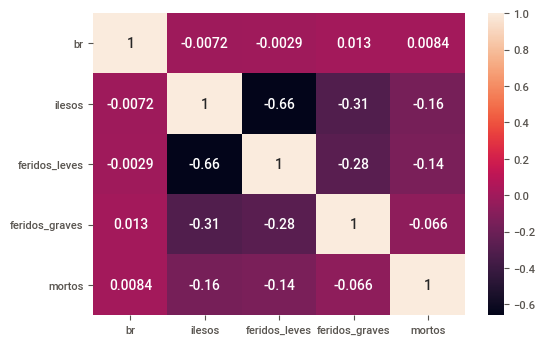

In [47]:
#plot de correlação dos dados
fig = sns.heatmap(dados.corr(), annot=True)
fig = plt.gcf()
plt.show();

In [48]:
#Matriz de correlação - person
dados.corr().round(4)

br  ilesos  feridos_leves  feridos_graves  mortos
br              1.0000 -0.0072        -0.0029          0.0130  0.0084
ilesos         -0.0072  1.0000        -0.6601         -0.3078 -0.1578
feridos_leves  -0.0029 -0.6601         1.0000         -0.2772 -0.1421
feridos_graves  0.0130 -0.3078        -0.2772          1.0000 -0.0663
mortos          0.0084 -0.1578        -0.1421         -0.0663  1.0000

In [49]:
# Correlação de spearman - leva em consideração  a correlação positiva e negativa
dados.corr('spearman').round(4)

br  ilesos  feridos_leves  feridos_graves  mortos
br              1.0000 -0.0057        -0.0045          0.0115  0.0105
ilesos         -0.0057  1.0000        -0.6601         -0.3078 -0.1578
feridos_leves  -0.0045 -0.6601         1.0000         -0.2772 -0.1421
feridos_graves  0.0115 -0.3078        -0.2772          1.0000 -0.0663
mortos          0.0105 -0.1578        -0.1421         -0.0663  1.0000

In [50]:
# porcentagem de valores que estão faltando
dados.isna().mean()

data_inversa              0.000000
dia_semana                0.000000
horario                   0.000000
uf                        0.000000
br                        0.000000
municipio                 0.000000
causa_acidente            0.000000
tipo_acidente             0.000000
fase_dia                  0.000000
sentido_via               0.000000
condicao_metereologica    0.000000
tipo_pista                0.000000
tipo_veiculo              0.000000
tipo_envolvido            0.000000
estado_fisico             0.000000
idade                     0.009459
sexo                      0.000000
ilesos                    0.000000
feridos_leves             0.000000
feridos_graves            0.000000
mortos                    0.000000
latitude                  0.000000
longitude                 0.000000
dtype: float64

In [51]:
# selecionar apenas colunas de objeto
dados.select_dtypes(include='object').head()

dia_semana   horario  uf         municipio               causa_acidente  \
0  terça-feira  04:00:00  CE            RUSSAS             Animais na Pista   
1  terça-feira  05:00:00  MT          AGUA BOA  Defeito Mecânico no Veículo   
2  terça-feira  10:00:00  PA        DOM ELISEU      Velocidade Incompatível   
3  terça-feira  08:30:00  BA          RIO REAL           Ingestão de Álcool   
4  terça-feira  13:50:00  BA  FEIRA DE SANTANA           Ingestão de Álcool   

               tipo_acidente   fase_dia  sentido_via condicao_metereologica  \
0    Atropelamento de Animal  Amanhecer  Decrescente                  Vento   
1                   Incêndio  Amanhecer  Decrescente         Garoa/Chuvisco   
2           Colisão traseira  Pleno dia  Decrescente                Nublado   
3           Colisão traseira  Pleno dia  Decrescente              Céu Claro   
4  Saída de leito carroçável  Pleno dia  Decrescente              Céu Claro   

  tipo_pista tipo_veiculo tipo_envolvido  estado_fisico       sexo  \
0    Simples     Caminhão       Condutor          Ileso  Masculino   
1    Simples     Caminhão       Condutor          Ileso  Masculino   
2    Simples     Caminhão       Condutor          Ileso  Masculino   
3      Dupla     Caminhão       Condutor          Ileso  Masculino   
4      Dupla     Caminhão     Passageiro  Lesões Graves  Masculino   

      latitude     longitude  
0    -4,766018    -38,056034  
1      -14,319       -52,169  
2  -4,15296734  -47,54608154  
3     -11,5896      -37,8761  
4      -12,344       -39,087

In [52]:
# Selecionar as colunas numéricas
dados.select_dtypes(include='number').head()

br  ilesos  feridos_leves  feridos_graves  mortos
0  116.0       1              0               0       0
1  158.0       1              0               0       0
2   10.0       1              0               0       0
3  101.0       1              0               0       0
4  116.0       0              0               1       0

In [53]:
# selecionar vários tipos de dados
dados.select_dtypes(include=['int', 'datetime', 'object']).head()

data_inversa   dia_semana   horario  uf         municipio  \
0   2019-01-01  terça-feira  04:00:00  CE            RUSSAS   
1   2019-01-01  terça-feira  05:00:00  MT          AGUA BOA   
2   2019-01-01  terça-feira  10:00:00  PA        DOM ELISEU   
3   2019-01-01  terça-feira  08:30:00  BA          RIO REAL   
4   2019-01-01  terça-feira  13:50:00  BA  FEIRA DE SANTANA   

                causa_acidente              tipo_acidente   fase_dia  \
0             Animais na Pista    Atropelamento de Animal  Amanhecer   
1  Defeito Mecânico no Veículo                   Incêndio  Amanhecer   
2      Velocidade Incompatível           Colisão traseira  Pleno dia   
3           Ingestão de Álcool           Colisão traseira  Pleno dia   
4           Ingestão de Álcool  Saída de leito carroçável  Pleno dia   

   sentido_via condicao_metereologica tipo_pista tipo_veiculo tipo_envolvido  \
0  Decrescente                  Vento    Simples     Caminhão       Condutor   
1  Decrescente         Garoa/Chuvisco    Simples     Caminhão       Condutor   
2  Decrescente                Nublado    Simples     Caminhão       Condutor   
3  Decrescente              Céu Claro      Dupla     Caminhão       Condutor   
4  Decrescente              Céu Claro      Dupla     Caminhão     Passageiro   

   estado_fisico       sexo     latitude     longitude  
0          Ileso  Masculino    -4,766018    -38,056034  
1          Ileso  Masculino      -14,319       -52,169  
2          Ileso  Masculino  -4,15296734  -47,54608154  
3          Ileso  Masculino     -11,5896      -37,8761  
4  Lesões Graves  Masculino      -12,344       -39,087

In [54]:
#Observando a porcentagem de envolvidos nos acidentes
todos_envolvidos = int(68634+5333+60500+18573)
dados1 = round(dados[['ilesos','mortos','feridos_leves','feridos_graves']].sum()/todos_envolvidos * 100, 1)
dados1

ilesos            44.8
mortos             3.5
feridos_leves     39.5
feridos_graves    12.1
dtype: float64

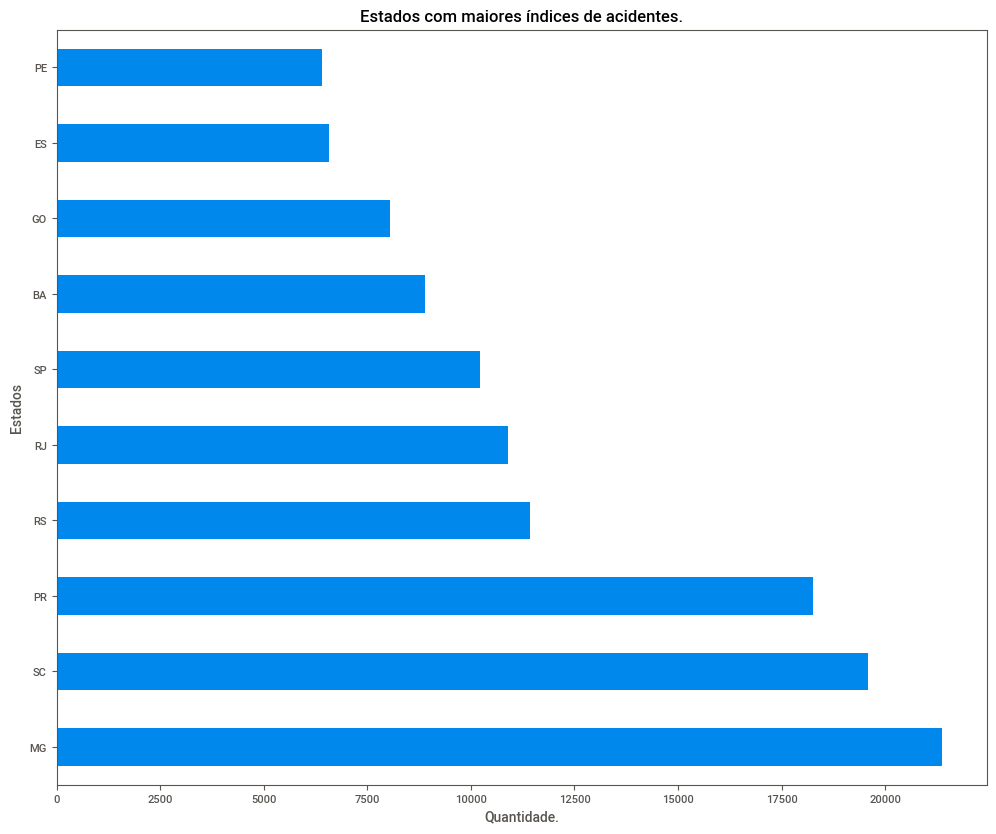

In [55]:
#Estados onde há mais acidentes
fig = plt.figure(figsize=(12,10))
fig = dados['uf'].value_counts().head(10).plot.barh()
fig.set_title("Estados com maiores índices de acidentes.")
fig.set_xlabel('Quantidade.')
fig.set_ylabel('Estados')
plt.show();

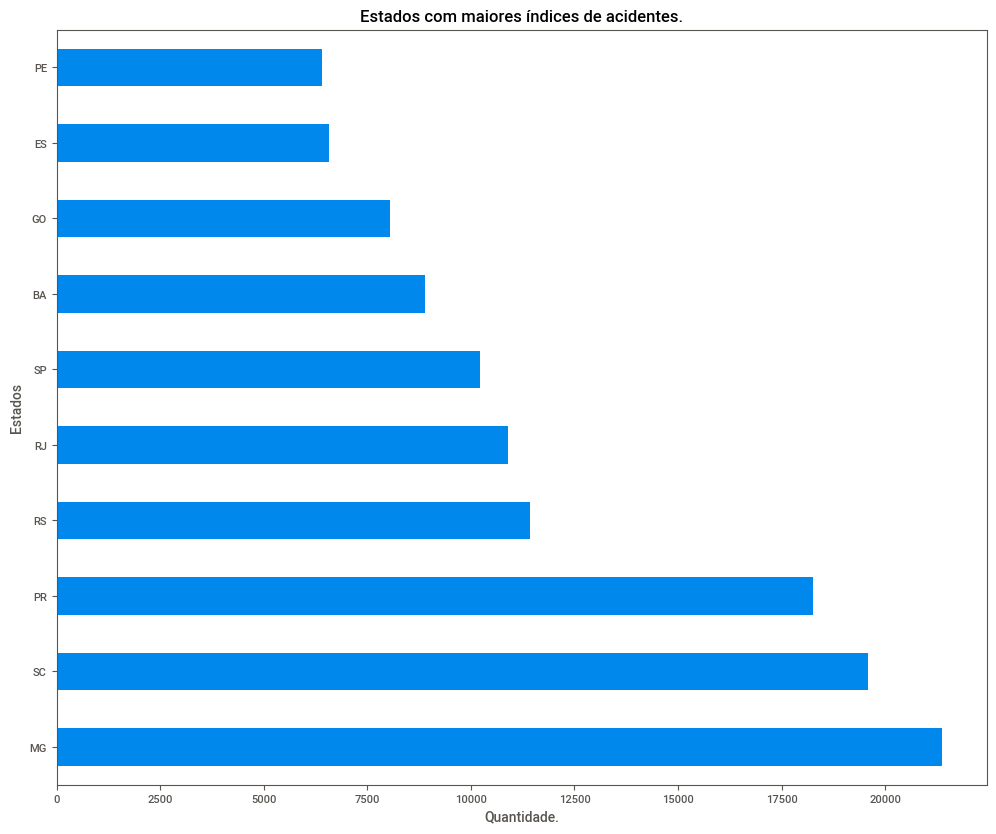

In [56]:
#Estados onde há mais acidentes
fig = plt.figure(figsize=(12,10))
fig = dados['uf'].value_counts().head(10).plot.barh()
fig.set_title("Estados com maiores índices de acidentes.")
fig.set_xlabel('Quantidade.')
fig.set_ylabel('Estados')
plt.show()

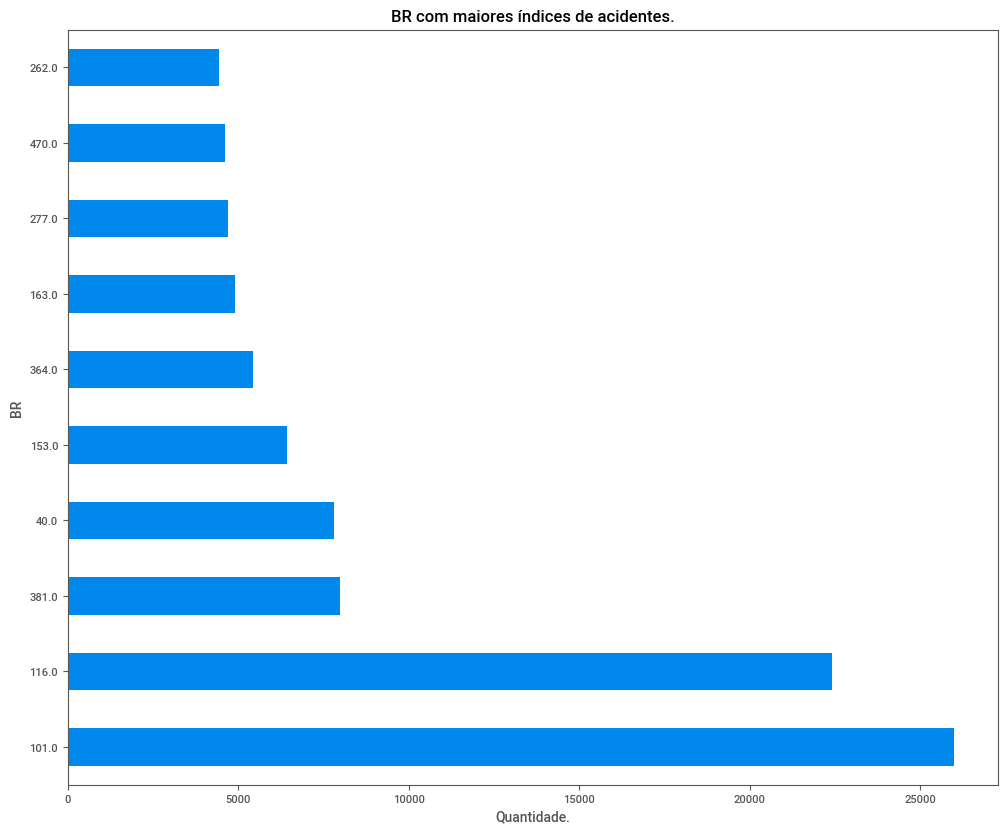

In [57]:
#Br com maiores índices de acidentes.
fig = plt.figure(figsize=(12,10))
fig = dados['br'].value_counts().head(10).plot.barh()
fig.set_title("BR com maiores índices de acidentes.")
fig.set_xlabel('Quantidade.')
fig.set_ylabel('BR')
plt.show();

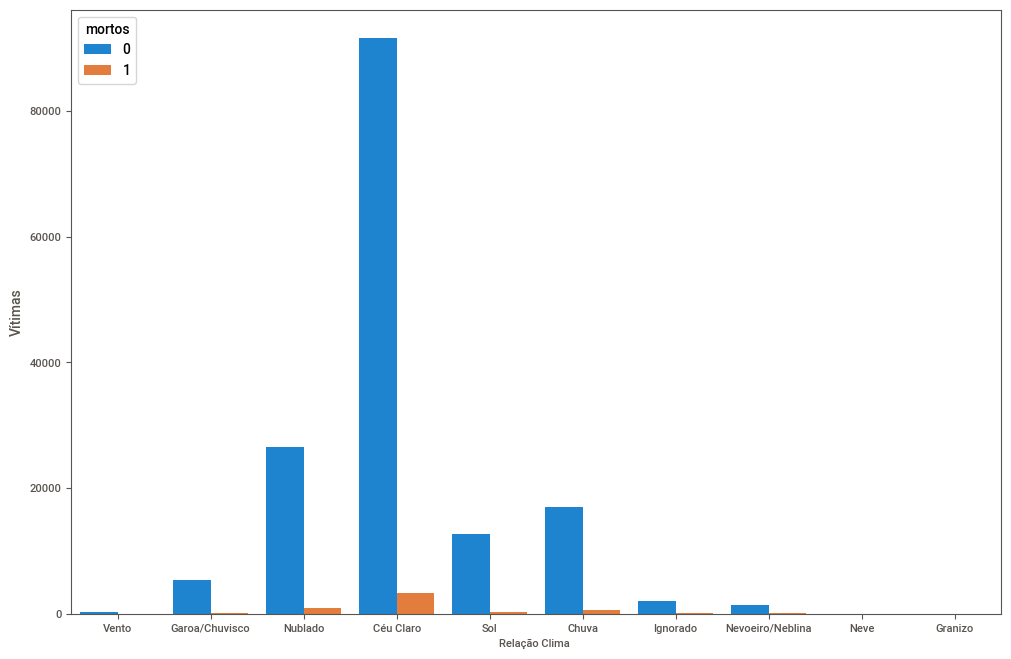

In [58]:
#Verificando se há relação entre o clima com o aumento dos acidentes
plt.figure(figsize=(12,8))
sns.countplot(x='condicao_metereologica',data=dados,hue='mortos')
plt.xlabel('Relação Clima ',size=8)
plt.ylabel('Vítimas')
plt.show();

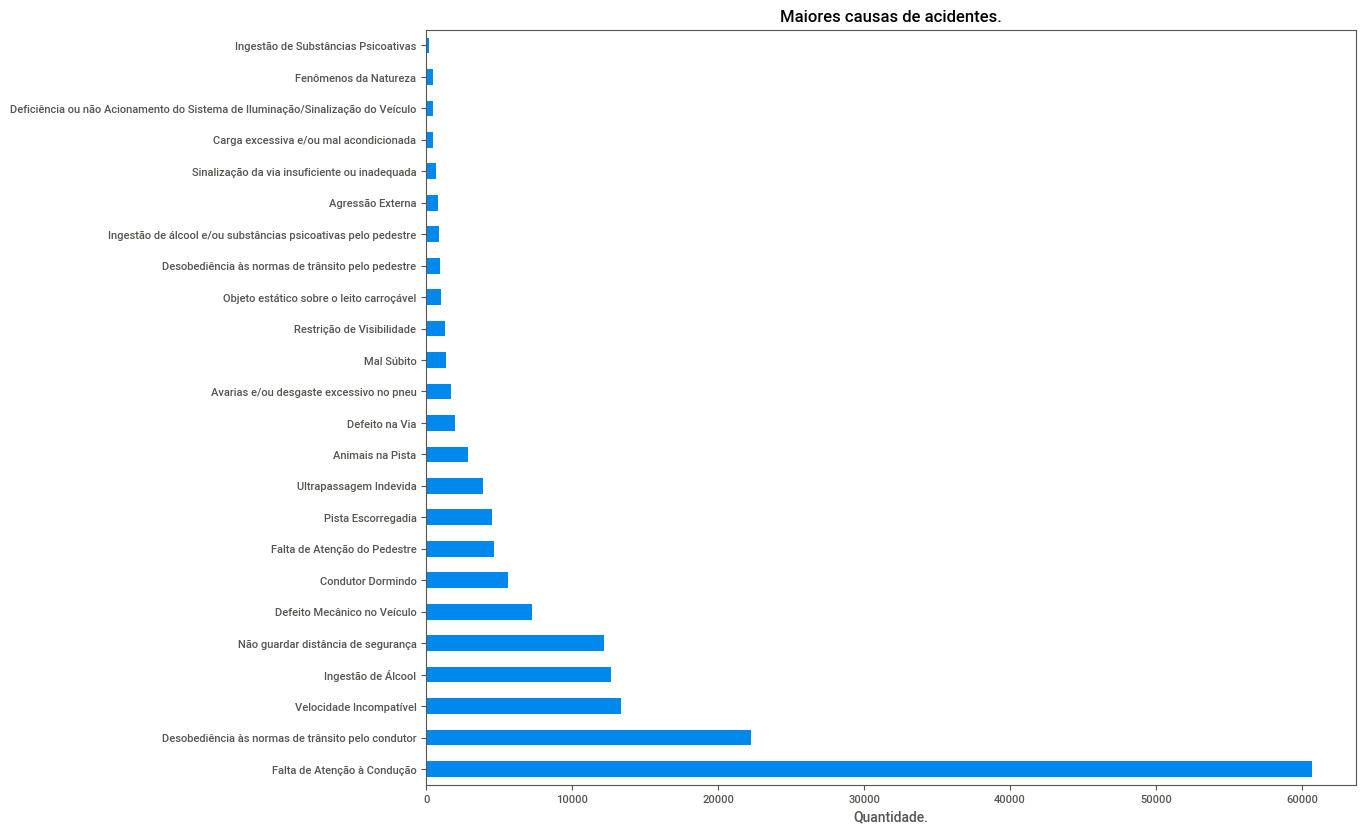

In [59]:
# Verificando a maior causa dos acidentes. 
fig = plt.figure(figsize=(12,10))
fig = dados['causa_acidente'].value_counts().plot.barh()
fig.set_title("Maiores causas de acidentes.")
fig.set_xlabel('Quantidade.')
plt.show();

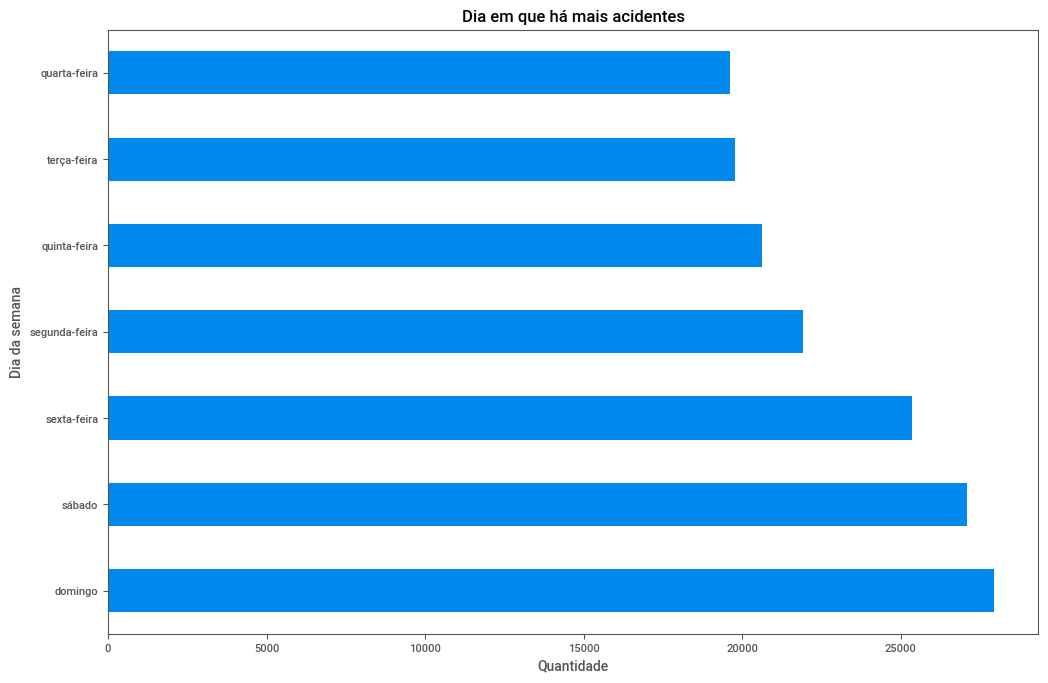

In [60]:
#Verificando o dia da semana que ocorrem mais acidentes.
fig = plt.figure(figsize=(12,8))
fig = dados['dia_semana'].value_counts().plot.barh()
fig.set_title("Dia em que há mais acidentes")
fig.set_xlabel('Quantidade')
fig.set_ylabel('Dia da semana')
plt.show()

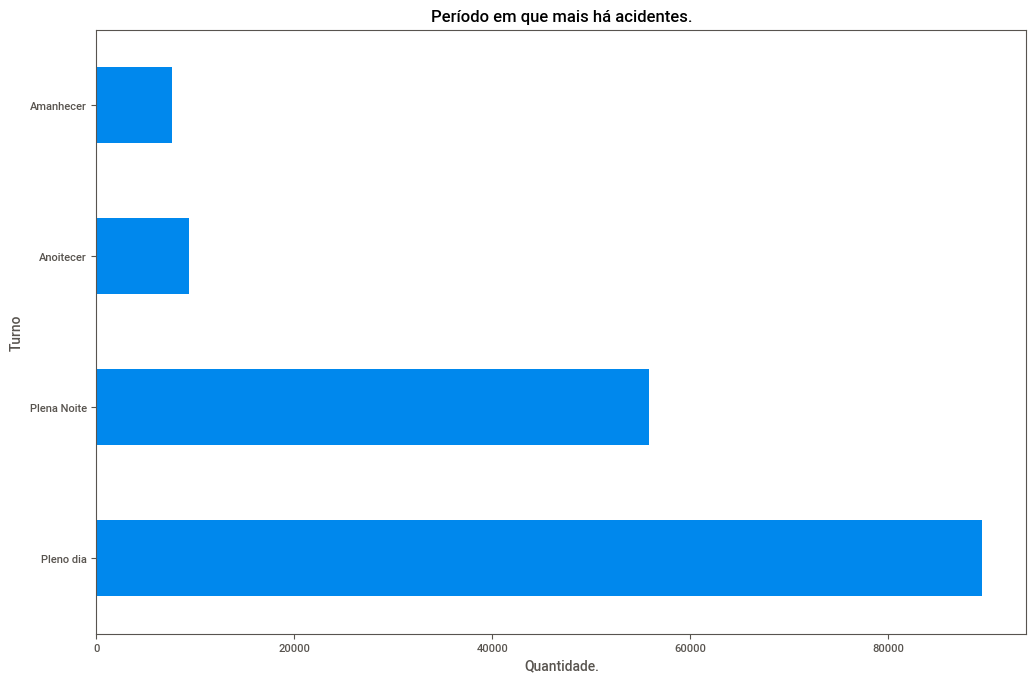

In [61]:
# Verificando o turno em que há mais acidentes. 
fig = plt.figure(figsize=(12,8))
fig = dados['fase_dia'].value_counts().plot.barh()
fig.set_title("Período em que mais há acidentes.")
fig.set_xlabel('Quantidade.')
fig.set_ylabel('Turno')
plt.show();

In [62]:
#Relação entre o tipo de acidentes com número de mortos. 
tipo_de_acidente= dados.groupby('tipo_acidente')[['mortos']].count().sort_values(by='mortos',ascending= False).head(20)
tipo_de_acidente.reset_index(inplace=True)

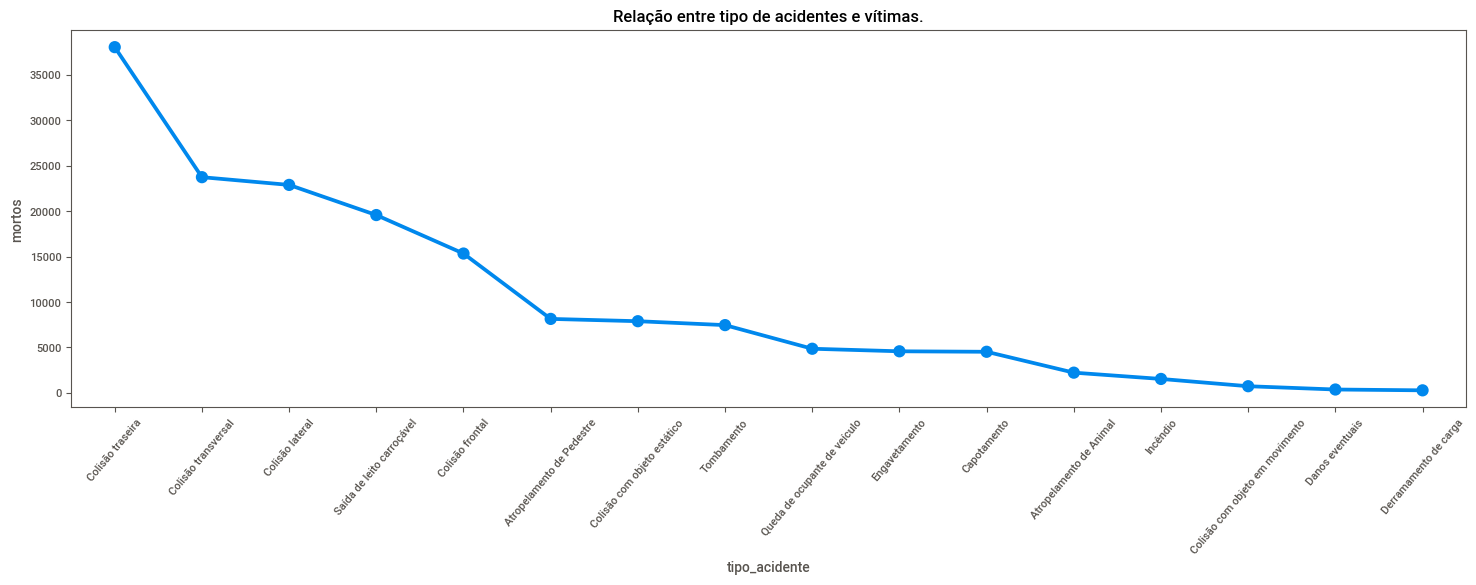

In [63]:
plt.figure(figsize=(18,5))
sns.pointplot(x='tipo_acidente', y='mortos',data=tipo_de_acidente)
plt.xticks(rotation=50)
plt.title('Relação entre tipo de acidentes e vítimas.')
plt.show();

In [64]:
#Relação dos acidentes com tipo de pista. 
dados.groupby('tipo_veiculo')['tipo_pista'].value_counts().head(20)

tipo_veiculo      tipo_pista
Automóvel         Simples       36219
                  Dupla         28825
                  Múltipla       5606
Bicicleta         Simples        1304
                  Dupla          1018
                  Múltipla        231
Caminhonete       Simples       10799
                  Dupla          6525
                  Múltipla       1064
Caminhão          Simples       14052
                  Dupla          8379
                  Múltipla       1154
Carro de mão      Dupla             4
                  Simples           2
Carroça-charrete  Simples          48
                  Dupla            41
                  Múltipla          7
Micro-ônibus      Simples         982
                  Dupla           430
                  Múltipla         77
Name: tipo_pista, dtype: int64

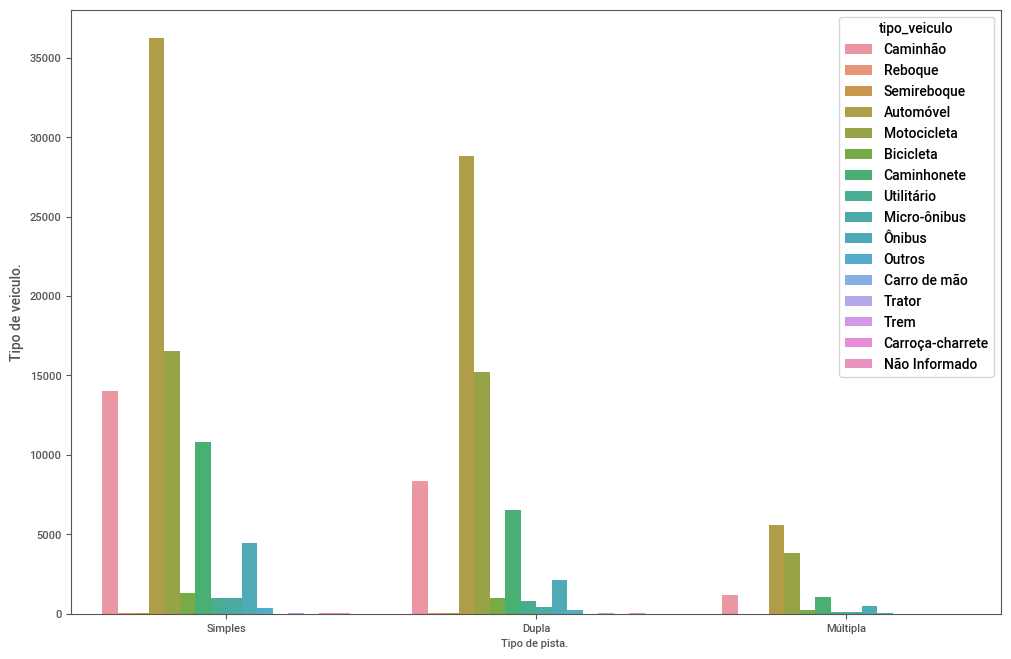

In [65]:
#Relação dos acidentes com tipo de pista. 
plt.figure(figsize=(12,8))
sns.countplot(x='tipo_pista',data=dados,hue='tipo_veiculo')
plt.xlabel('Tipo de pista. ',size=8)
plt.ylabel('Tipo de veiculo.')
plt.show();

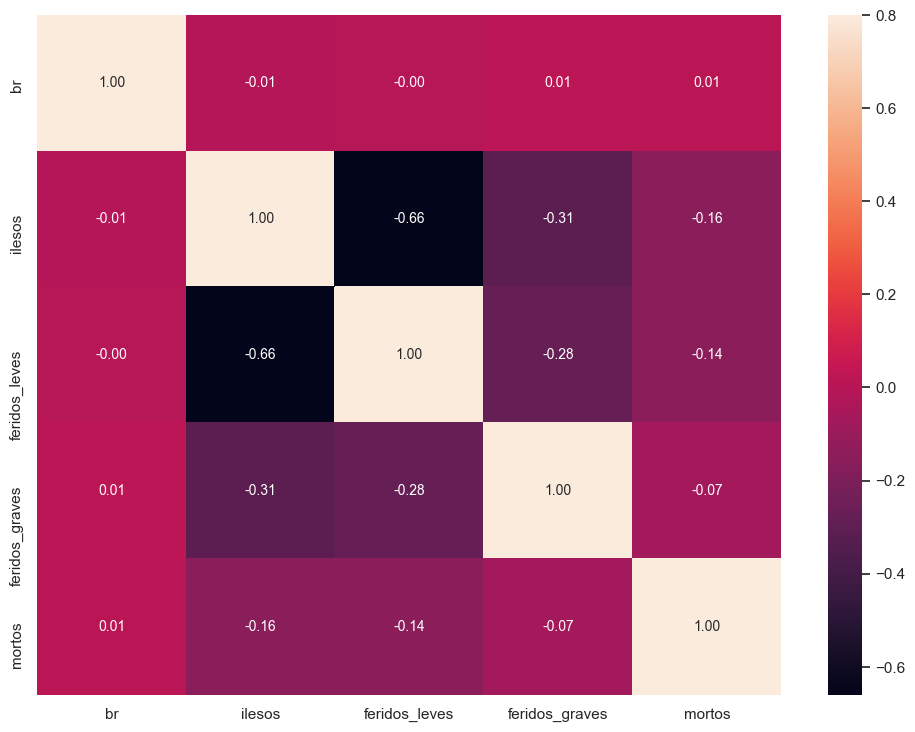

In [66]:
# Possibilita a análise simultânea da associação entre variáveis.
corr = dados.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 10}, annot=True, fmt='.2f');

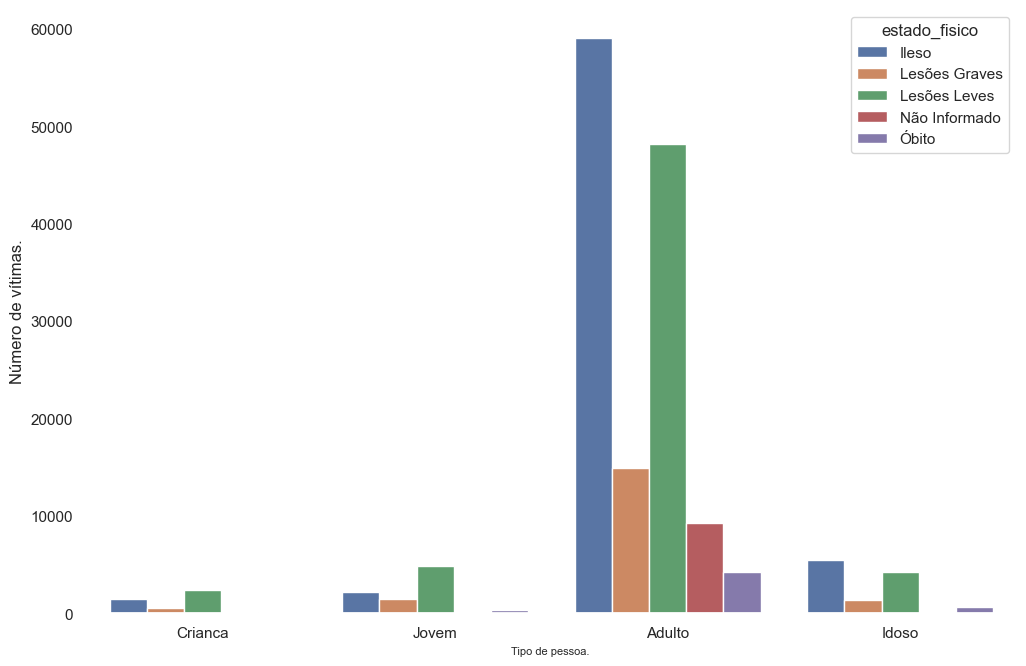

In [67]:
plt.figure(figsize=(12,8))
sns.countplot(x='idade',data=dados,hue='estado_fisico')
plt.xlabel('Tipo de pessoa. ',size=8)
plt.ylabel('Número de vítimas.')
plt.show();

In [68]:
# Rodovias federais mais letais
dados_br_uf_mortos = dados.groupby(by=['uf', 'br'])['mortos'].count().reset_index(name='Quantidade')
dados2 = dados.groupby(by=['uf', 'br'])['mortos'].sum().reset_index(name='Mortos')
dados_br_uf_mortos = dados_br_uf_mortos.join(dados2.Mortos)
dados_br_uf_mortos['Mortos por 100 acidentes'] = 100*(dados_br_uf_mortos.Mortos / dados_br_uf_mortos.Quantidade)
dados_br_uf_mortos.nlargest(10,'Mortos')


uf     br  Quantidade  Mortos  Mortos por 100 acidentes
235  SP  116.0        7102     148                  2.083920
222  SC  101.0        8751     146                  1.668381
99   MG  381.0        6630     144                  2.171946
84   MG   40.0        4265     138                  3.235639
165  PR  277.0        4703     138                  2.934297
18   BA  101.0        2066     132                  6.389158
20   BA  116.0        2129     118                  5.542508
169  PR  376.0        4297     117                  2.722830
177  RJ  116.0        3179     112                  3.523120
86   MG  116.0        2773     109                  3.930761

In [69]:
# Cruzando os valores das variaveis 
# podemos ver a distribuição dos dados
# 0-15 anos (Crianca) / 16-20 anos (Jovem) / 20-59 anos (Adulto) / 59-78 anos (Idoso)
pd.crosstab(dados['idade'],dados['sexo'])

sexo     Feminino  Masculino  Não Informado
idade                                      
Crianca      2197       2387              4
Jovem        3113       5658              5
Adulto      28557      96799          10314
Idoso        2677       9026              1

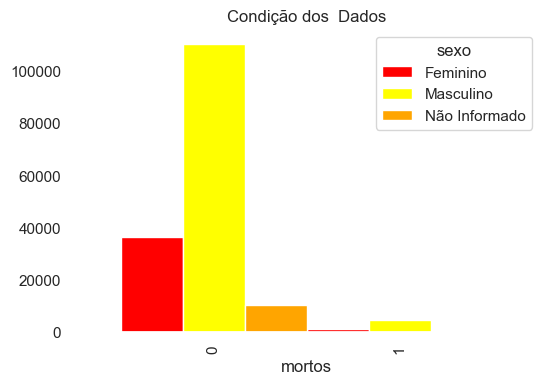

In [70]:
table = pd.crosstab(dados['mortos'],dados['sexo'])
table.plot(kind='bar',width=1.0, color=['red','yellow','orange','blue','green'], title='Condição dos  Dados',grid=False);

In [71]:
# Total de pessoas por sexo
dados.groupby('sexo').size()

sexo
Feminino          37155
Masculino        114781
Não Informado     10337
dtype: int64

In [72]:
# # quantos acidentes por municipio
dados['municipio'].value_counts()

BRASILIA             2727
CURITIBA             2514
SAO JOSE             1839
GUARULHOS            1711
SERRA                1492
                     ... 
BUIQUE                  1
COLINAS                 1
FEIJO                   1
SANTA FE DE GOIAS       1
CACHOEIRA               1
Name: municipio, Length: 1767, dtype: int64

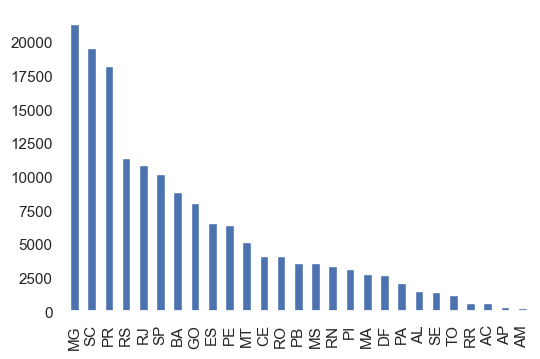

In [73]:
# quantos acidentes por estados
dados['uf'].value_counts().plot.bar();

In [74]:
# quantos acidentes por estados
dados['uf'].value_counts()

MG    21380
SC    19574
PR    18259
RS    11425
RJ    10889
SP    10223
BA     8888
GO     8040
ES     6581
PE     6405
MT     5170
CE     4101
RO     4082
PB     3619
MS     3576
RN     3398
PI     3115
MA     2744
DF     2727
PA     2100
AL     1499
SE     1446
TO     1213
RR      640
AC      601
AP      332
AM      246
Name: uf, dtype: int64

In [75]:
# # quantos acidentes e sua causas
dados['causa_acidente'].value_counts()

Falta de Atenção à Condução                                                       60672
Desobediência às normas de trânsito pelo condutor                                 22239
Velocidade Incompatível                                                           13370
Ingestão de Álcool                                                                12646
Não guardar distância de segurança                                                12206
Defeito Mecânico no Veículo                                                        7252
Condutor Dormindo                                                                  5582
Falta de Atenção do Pedestre                                                       4651
Pista Escorregadia                                                                 4535
Ultrapassagem Indevida                                                             3925
Animais na Pista                                                                   2851
Defeito na Via                  

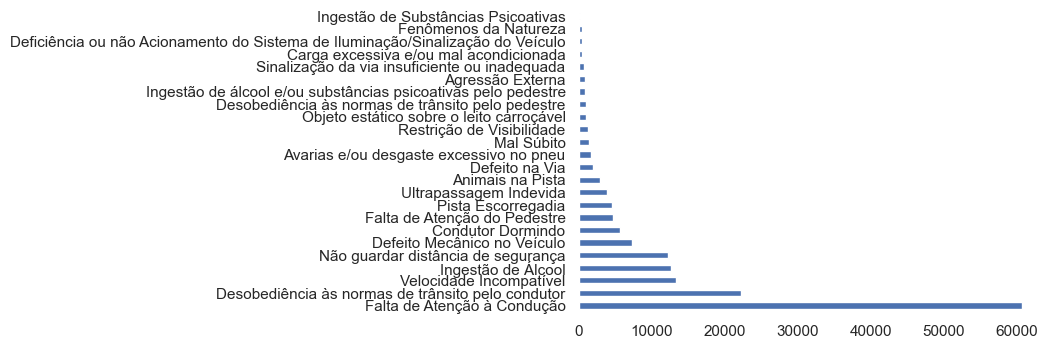

In [76]:
dados['causa_acidente'].value_counts().plot.barh();

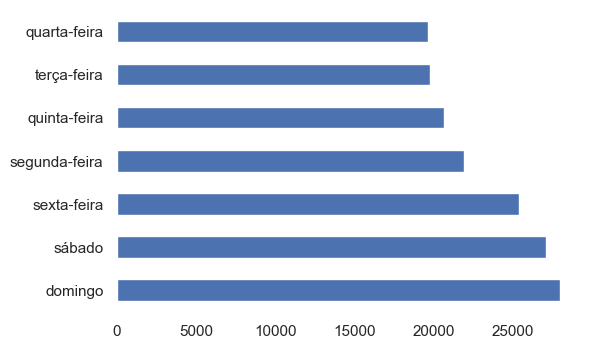

In [77]:
dados['dia_semana'].value_counts().plot.barh();

In [78]:
# maior idade 2018
dados[dados['idade'] == dados['idade'].max()]

data_inversa    dia_semana   horario  uf     br             municipio  \
41       2019-01-02  quarta-feira  22:35:00  MG  381.0              NOVA ERA   
57       2019-01-03  quinta-feira  09:55:00  RS  386.0            MONTENEGRO   
99       2019-01-03  quinta-feira  22:00:00  GO   60.0  TEREZOPOLIS DE GOIAS   
109      2019-01-04   sexta-feira  06:45:00  ES  101.0                 VIANA   
119      2019-01-04   sexta-feira  06:20:00  MG  381.0               EXTREMA   
...             ...           ...       ...  ..    ...                   ...   
162127   2019-12-20   sexta-feira  18:44:00  PR  476.0             ARAUCARIA   
162131   2019-11-30        sábado  20:00:00  SC  101.0               TIJUCAS   
162136   2019-12-21        sábado  07:50:00  RJ  116.0           BARRA MANSA   
162176   2019-11-27  quarta-feira  01:00:00  MG  153.0               ARAPORA   
162202   2019-11-08   sexta-feira  09:10:00  SC  101.0              MARACAJA   

                                           causa_acidente  \
41      Desobediência às normas de trânsito pelo pedestre   
57                                Velocidade Incompatível   
99                            Falta de Atenção à Condução   
109                           Falta de Atenção à Condução   
119                           Falta de Atenção à Condução   
...                                                   ...   
162127                        Falta de Atenção à Condução   
162131                        Falta de Atenção à Condução   
162136                        Falta de Atenção à Condução   
162176                            Velocidade Incompatível   
162202  Desobediência às normas de trânsito pelo condutor   

                      tipo_acidente     fase_dia  sentido_via  \
41        Atropelamento de Pedestre  Plena Noite    Crescente   
57                 Colisão traseira    Pleno dia    Crescente   
99              Colisão transversal  Plena Noite    Crescente   
109                 Colisão lateral    Pleno dia    Crescente   
119     Colisão com objeto estático    Amanhecer  Decrescente   
...                             ...          ...          ...   
162127          Colisão transversal    Anoitecer  Decrescente   
162131              Colisão lateral  Plena Noite    Crescente   
162136    Atropelamento de Pedestre    Pleno dia    Crescente   
162176             Colisão traseira  Plena Noite  Decrescente   
162202          Colisão transversal    Pleno dia    Crescente   

       condicao_metereologica tipo_pista tipo_veiculo tipo_envolvido  \
41                    Nublado    Simples     Caminhão       Pedestre   
57                      Chuva    Simples     Caminhão     Passageiro   
99                   Ignorado      Dupla     Caminhão       Condutor   
109                 Céu Claro   Múltipla     Caminhão       Condutor   
119                   Nublado      Dupla     Caminhão       Condutor   
...                       ...        ...          ...            ...   
162127                Nublado    Simples    Automóvel       Condutor   
162131              Céu Claro    Simples  Motocicleta       Condutor   
162136              Céu Claro   Múltipla    Automóvel       Pedestre   
162176                  Chuva      Dupla       Ônibus     Passageiro   
162202              Céu Claro      Dupla    Automóvel       Condutor   

        estado_fisico  idade       sexo  ilesos  feridos_leves  \
41      Lesões Graves  Idoso  Masculino       0              0   
57              Ileso  Idoso   Feminino       1              0   
99              Ileso  Idoso  Masculino       1              0   
109             Ileso  Idoso  Masculino       1              0   
119             Ileso  Idoso  Masculino       1              0   
...               ...    ...        ...     ...            ...   
162127          Ileso  Idoso  Masculino       1              0   
162131  Lesões Graves  Idoso  Masculino       0              0   
162136   Lesões Leves  Idoso   Feminino       0              1   
162176 

In [79]:
dados['dia_semana'].value_counts()

domingo          27930
sábado           27071
sexta-feira      25360
segunda-feira    21902
quinta-feira     20634
terça-feira      19770
quarta-feira     19606
Name: dia_semana, dtype: int64

In [80]:
dados_br_uf_mortos[dados_br_uf_mortos.Mortos > 100].nlargest(10,'Mortos por 100 acidentes')

uf     br  Quantidade  Mortos  Mortos por 100 acidentes
18   BA  101.0        2066     132                  6.389158
20   BA  116.0        2129     118                  5.542508
86   MG  116.0        2773     109                  3.930761
177  RJ  116.0        3179     112                  3.523120
84   MG   40.0        4265     138                  3.235639
165  PR  277.0        4703     138                  2.934297
176  RJ  101.0        3683     108                  2.932392
169  PR  376.0        4297     117                  2.722830
99   MG  381.0        6630     144                  2.171946
235  SP  116.0        7102     148                  2.083920

In [81]:
# Condiçoes do acidentes
dados['condicao_metereologica'].value_counts()

Céu Claro           94822
Nublado             27464
Chuva               17510
Sol                 12956
Garoa/Chuvisco       5535
Ignorado             2126
Nevoeiro/Neblina     1525
Vento                 327
Granizo                 7
Neve                    1
Name: condicao_metereologica, dtype: int64

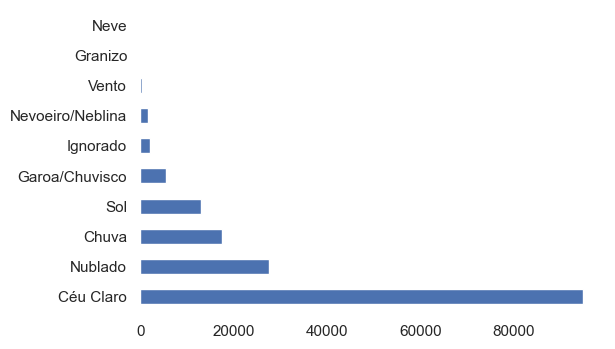

In [82]:
dados['condicao_metereologica'].value_counts().plot.barh();

In [83]:
# ordena por uf
dados.sort_values(by="uf",).head()

data_inversa   dia_semana   horario  uf     br   municipio  \
103583   2019-08-09  sexta-feira  06:30:00  AC  364.0      BUJARI   
157428   2019-12-22      domingo  17:30:00  AC  364.0  RIO BRANCO   
157427   2019-12-22      domingo  17:30:00  AC  364.0  RIO BRANCO   
157426   2019-12-22      domingo  17:30:00  AC  364.0  RIO BRANCO   
157425   2019-12-22      domingo  17:30:00  AC  364.0  RIO BRANCO   

                     causa_acidente     tipo_acidente     fase_dia  \
103583               Defeito na Via   Colisão lateral    Pleno dia   
157428  Falta de Atenção à Condução  Colisão traseira  Plena Noite   
157427  Falta de Atenção à Condução  Colisão traseira  Plena Noite   
157426  Falta de Atenção à Condução  Colisão traseira  Plena Noite   
157425  Falta de Atenção à Condução  Colisão traseira  Plena Noite   

        sentido_via condicao_metereologica tipo_pista tipo_veiculo  \
103583  Decrescente              Céu Claro    Simples    Automóvel   
157428    Crescente                  Chuva    Simples    Automóvel   
157427    Crescente                  Chuva    Simples  Caminhonete   
157426    Crescente                  Chuva    Simples  Caminhonete   
157425    Crescente                  Chuva    Simples  Caminhonete   

       tipo_envolvido estado_fisico   idade       sexo  ilesos  feridos_leves  \
103583     Passageiro  Lesões Leves  Adulto  Masculino       0              1   
157428     Passageiro         Ileso  Adulto  Masculino       1              0   
157427       Condutor         Ileso   Jovem  Masculino       1              0   
157426     Passageiro         Ileso  Adulto   Feminino       1              0   
157425     Passageiro         Ileso  Adulto   Feminino       1              0   

        feridos_graves  mortos     latitude     longitude  
103583               0       0  -9,77647958  -68,04125373  
157428               0       0   -10,012822     -67,80875  
157427               0       0   -10,012822     -67,80875  
157426               0       0   -10,012822     -67,80875  
157425               0       0   -10,012822     -67,80875

In [84]:
dados['municipio'].nunique()

1767

In [85]:
dados[dados['municipio'] == 'RECIFE']

data_inversa     dia_semana   horario  uf     br municipio  \
27       2019-01-02   quarta-feira  13:35:00  PE  101.0    RECIFE   
245      2019-01-07  segunda-feira  02:00:00  PE  101.0    RECIFE   
323      2019-01-09   quarta-feira  00:55:00  PE  101.0    RECIFE   
431      2019-01-11    sexta-feira  04:00:00  PE  101.0    RECIFE   
511      2019-01-12         sábado  09:12:00  PE  101.0    RECIFE   
...             ...            ...       ...  ..    ...       ...   
162223   2019-12-27    sexta-feira  13:45:00  PE  101.0    RECIFE   
162249   2019-11-29    sexta-feira  17:50:00  PE  101.0    RECIFE   
162250   2019-11-29    sexta-feira  17:50:00  PE  101.0    RECIFE   
162251   2019-11-29    sexta-feira  17:50:00  PE  101.0    RECIFE   
162252   2019-11-29    sexta-feira  17:50:00  PE  101.0    RECIFE   

                      causa_acidente                tipo_acidente  \
27       Falta de Atenção à Condução              Colisão lateral   
245      Falta de Atenção à Condução                   Tombamento   
323      Falta de Atenção à Condução  Colisão com objeto estático   
431      Falta de Atenção à Condução    Saída de leito carroçável   
511      Falta de Atenção à Condução              Colisão lateral   
...                              ...                          ...   
162223   Falta de Atenção à Condução              Colisão lateral   
162249  Falta de Atenção do Pedestre    Atropelamento de Pedestre   
162250  Falta de Atenção do Pedestre    Atropelamento de Pedestre   
162251  Falta de Atenção do Pedestre    Atropelamento de Pedestre   
162252  Falta de Atenção do Pedestre    Atropelamento de Pedestre   

           fase_dia  sentido_via condicao_metereologica tipo_pista  \
27        Pleno dia    Crescente                    Sol   Múltipla   
245     Plena Noite  Decrescente                  Chuva    Simples   
323     Plena Noite  Decrescente                  Chuva      Dupla   
431     Plena Noite  Decrescente                  Chuva      Dupla   
511       Pleno dia  Decrescente                  Chuva    Simples   
...             ...          ...                    ...        ...   
162223    Pleno dia  Decrescente              Céu Claro      Dupla   
162249    Anoitecer  Decrescente              Céu Claro      Dupla   
162250    Anoitecer  Decrescente              Céu Claro      Dupla   
162251    Anoitecer  Decrescente              Céu Claro      Dupla   
162252    Anoitecer  Decrescente              Céu Claro      Dupla   

       tipo_veiculo tipo_envolvido  estado_fisico    idade           sexo  \
27         Caminhão       Condutor          Ileso   Adulto      Masculino   
245        Caminhão       Condutor          Ileso   Adulto      Masculino   
323        Caminhão       Condutor          Óbito   Adulto      Masculino   
431        Caminhão       Condutor   Lesões Leves   Adulto      Masculino   
511        Caminhão       Condutor  Não Informado   Adulto  Não Informado   
...             ...            ...            ...      ...            ...   
162223    Automóvel     Passageiro          Ileso   Adulto      Masculino   
162249  Motocicleta       Pedestre  Lesões Graves  Crianca      Masculino   
162250  Motocicleta       Pedestre   Lesões Leves   Adulto      Masculino   
162251  Motocicleta       Pedestre  Lesões Graves   Adulto      Masculino   
162252  Motocicleta       Condutor  Lesões Graves   Adulto      Masculino   

        ilesos  feridos_leves  feridos_graves  mortos     latitude  \
27           1              0               0       0      -8,0678   
245          1              0               0       0      -8,1194   
323          0              0               0       1      -8,0595   
431          0              1               0       0      -8,0595   
511          0              0               0       0      -8,1194   
...        ...            ...             ...     ...          ...   
162223       1              0               0       0  -8,04041608   
162249       0         

In [86]:
# Retorna a quantidade de dimensões
dados.ndim

2

In [87]:
# numeros de Estados
dados['uf'].unique().shape[0]

27

In [88]:
dados.sort_values(by='mortos', ascending=False).head(10)

data_inversa     dia_semana   horario  uf     br  \
70429    2019-05-12        domingo  09:00:00  MT  163.0   
68341    2019-05-06  segunda-feira  20:20:00  RJ  101.0   
29393    2019-01-17   quinta-feira  12:15:00  RO  364.0   
136989   2019-11-04  segunda-feira  00:12:00  RJ  101.0   
143981   2019-11-21   quinta-feira  17:00:00  DF   80.0   
99526    2019-07-28        domingo  20:55:00  SP  381.0   
147637   2019-11-30         sábado  22:36:00  BA  324.0   
106087   2019-08-15   quinta-feira  22:20:00  GO   40.0   
46698    2019-03-06   quarta-feira  20:00:00  SC  101.0   
96145    2019-07-20         sábado  19:45:00  RS  158.0   

                    municipio  \
70429      LUCAS DO RIO VERDE   
68341   CAMPOS DOS GOYTACAZES   
29393                 VILHENA   
136989                NITEROI   
143981               BRASILIA   
99526                 ATIBAIA   
147637               CANDEIAS   
106087             CRISTALINA   
46698                 BIGUACU   
96145    PALMEIRA DAS MISSOES   

                                           causa_acidente  \
70429                              Ultrapassagem Indevida   
68341                         Falta de Atenção à Condução   
29393                         Falta de Atenção à Condução   
136989                       Falta de Atenção do Pedestre   
143981                        Falta de Atenção à Condução   
99526   Desobediência às normas de trânsito pelo pedestre   
147637  Desobediência às normas de trânsito pelo condutor   
106087                        Falta de Atenção à Condução   
46698                        Falta de Atenção do Pedestre   
96145                                   Condutor Dormindo   

                    tipo_acidente     fase_dia  sentido_via  \
70429             Colisão lateral    Pleno dia  Decrescente   
68341            Colisão traseira  Plena Noite  Decrescente   
29393         Colisão transversal    Pleno dia    Crescente   
136989  Atropelamento de Pedestre  Plena Noite    Crescente   
143981        Colisão transversal    Pleno dia    Crescente   
99526   Atropelamento de Pedestre  Plena Noite  Decrescente   
147637                Capotamento  Plena Noite    Crescente   
106087           Colisão traseira  Plena Noite    Crescente   
46698   Atropelamento de Pedestre  Plena Noite    Crescente   
96145   Saída de leito carroçável  Plena Noite  Decrescente   

       condicao_metereologica tipo_pista tipo_veiculo tipo_envolvido  \
70429               Céu Claro    Simples  Motocicleta     Passageiro   
68341               Céu Claro      Dupla    Bicicleta       Condutor   
29393               Céu Claro      Dupla  Motocicleta       Condutor   
136989                Nublado      Dupla    Automóvel       Pedestre   
143981                  Chuva    Simples  Motocicleta       Condutor   
99526               Céu Claro      Dupla  Caminhonete       Pedestre   
147637              Céu Claro      Dupla    Automóvel     Passageiro   
106087              Céu Claro      Dupla  Caminhonete       Condutor   
46698               Céu Claro      Dupla  Caminhonete       Pedestre   
96145               Céu Claro    Simples    Automóvel       Condutor   

       estado_fisico   idade       sexo  ilesos  feridos_leves  \
70429          Óbito   Jovem   Feminino       0              0   
68341          Óbito   Jovem   Feminino       0              0   
29393          Óbito   Idoso  Masculino       0              0   
136989         Óbito  Adulto  Masculino       0              0   
143981         Óbito   Jovem  Masculino       0              0   
99526          Óbito  Adulto  Masculino       0              0   
147637         Óbito  Adulto  Masculino       0              0   
106087         Óbito  Adulto  Masculino       0              0   
46698          Óbito  Adulto   Feminino       0              0   
96145          Óbito  Adulto  Masculino       0              0   

        feridos_graves  mortos      latitude     longitude  
70429                0       1  -13,48678294  

In [89]:
# numeros de municipios
dados['municipio'].unique().shape[0]

1767

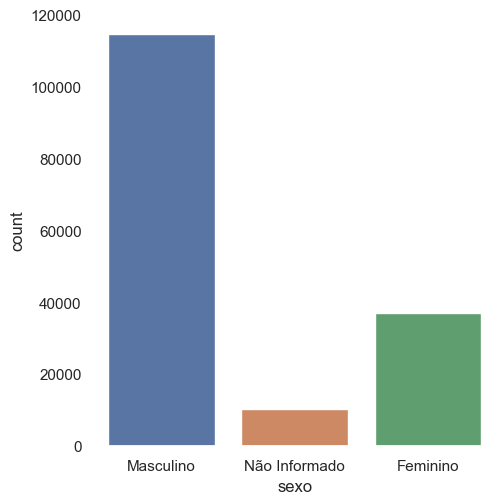

In [90]:
# Distribuição das classes (variável sexo)
sns.catplot(x='sexo',kind='count',data=dados,orient="h");

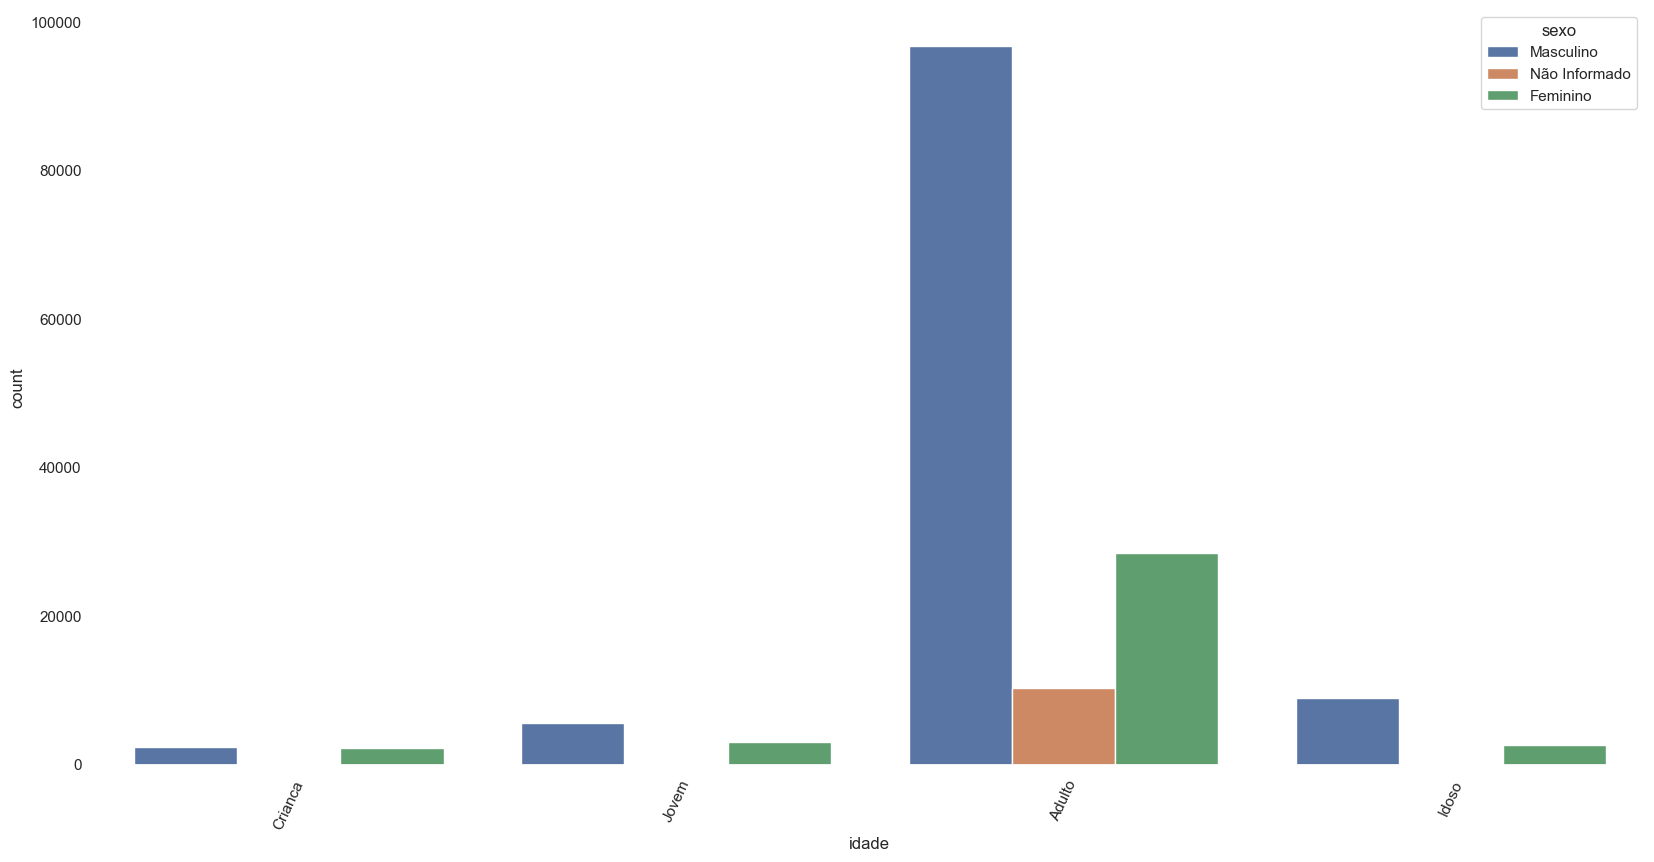

In [91]:
# Distribuição das classes por sexo e idade
plt.figure(figsize=(20,10))
sns.countplot(data=dados, x = 'idade',  hue = 'sexo')
plt.xticks(rotation=65);

In [92]:
# Municípios mais letais
dados_municipio_mortos = dados.groupby(by=['municipio'])['mortos'].count().reset_index(name='Quantidade')
dados2 = dados.groupby(by=['municipio'])['mortos'].sum().reset_index(name='Mortos')
dados_municipio_mortos = dados_municipio_mortos.join(dados2.Mortos)
dados_municipio_mortos['Mortos por 100 acidentes'] = 100*(dados_municipio_mortos.Mortos / dados_municipio_mortos.Quantidade)
dados_municipio_mortos.nlargest(10,'Mortos')

municipio  Quantidade  Mortos  Mortos por 100 acidentes
229                BRASILIA        2727      52                  1.906857
493                CURITIBA        2514      40                  1.591090
1591                  SERRA        1492      27                  1.809651
318   CAMPOS DOS GOYTACAZES         829      25                  3.015682
527         DUQUE DE CAXIAS        1357      25                  1.842299
569        FEIRA DE SANTANA         862      25                  2.900232
947                  MARABA         413      24                  5.811138
162               BARREIRAS         327      23                  7.033639
307            CAMPO GRANDE         778      23                  2.956298
668               GUARULHOS        1711      23                  1.344243

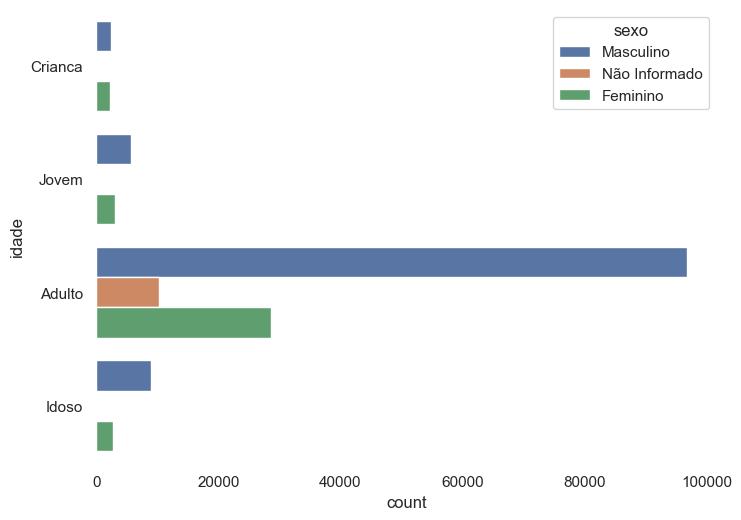

In [93]:
# Relação das colunas idade,sexo
plt.figure(figsize=(8,6))
sns.countplot(y="idade", hue='sexo', data=dados);

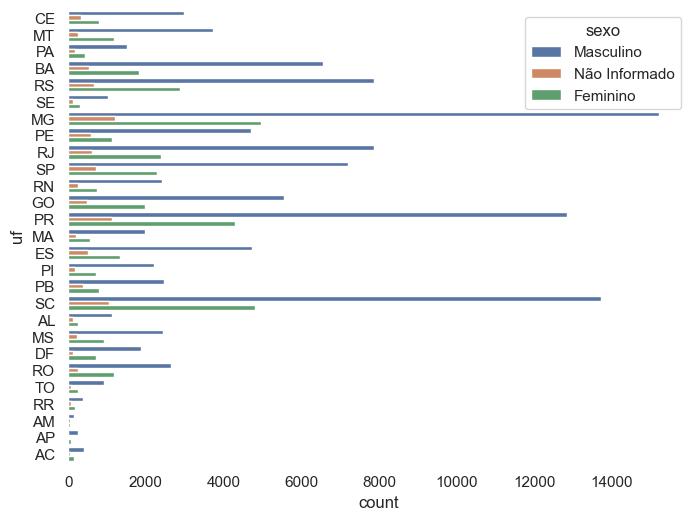

In [94]:
# Relação das colunas uf,sexo
plt.figure(figsize=(8,6))
sns.countplot(y="uf", hue='sexo', data=dados);

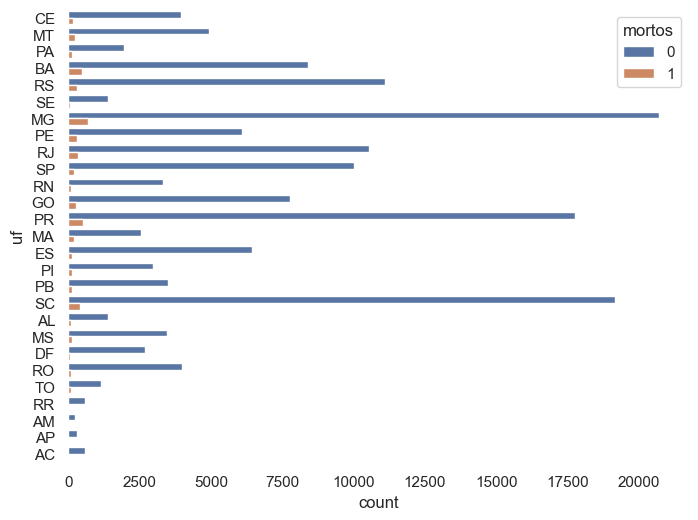

In [95]:
# Relação das colunas uf,sexo
plt.figure(figsize=(8,6))
sns.countplot(y="uf", hue='mortos', data=dados);

In [96]:
# # Número de pessoas por idade  e seus respectivos sexos
pd.crosstab(dados['sexo'],dados['idade'])

idade          Crianca  Jovem  Adulto  Idoso
sexo                                        
Feminino          2197   3113   28557   2677
Masculino         2387   5658   96799   9026
Não Informado        4      5   10314      1

In [97]:
# Número de mortos por sexo
# 0 - não sobreviveu    1 - sobreviveu
pd.crosstab(dados['sexo'],dados['mortos'])

mortos              0     1
sexo                       
Feminino        36189   966
Masculino      110430  4351
Não Informado   10321    16

In [98]:
# Média de mortos por sexo
dados[['sexo','mortos']].groupby(['sexo'], as_index = False).mean().sort_values(by='mortos',ascending=False)

sexo    mortos
1      Masculino  0.037907
0       Feminino  0.025999
2  Não Informado  0.001548

In [99]:
# Média de mortos por idade
dados[['idade','mortos']].groupby(['idade'], as_index = False).mean().sort_values(by='mortos',ascending=False)

idade    mortos
3    Idoso  0.050837
1    Jovem  0.038400
2   Adulto  0.030884
0  Crianca  0.028771

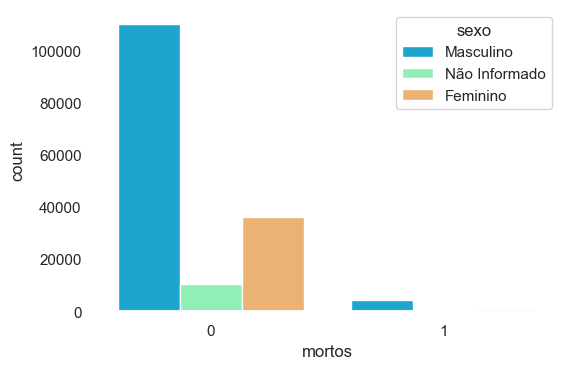

In [100]:
sns.countplot(x='mortos' ,hue='sexo', data=dados, palette='rainbow');

In [101]:
# Número de mortes por estado
# 0 - não sobreviveu    1 - sobreviveu
pd.crosstab(dados['uf'],dados['mortos'])

mortos      0    1
uf                
AC        577   24
AL       1402   97
AM        228   18
AP        316   16
BA       8413  475
CE       3944  157
DF       2675   52
ES       6434  147
GO       7763  277
MA       2547  197
MG      20702  678
MS       3452  124
MT       4944  226
PA       1964  136
PB       3489  130
PE       6097  308
PI       2966  149
PR      17759  500
RJ      10536  353
RN       3308   90
RO       3993   89
RR        602   38
RS      11121  304
SC      19171  403
SE       1384   62
SP      10019  204
TO       1134   79

In [102]:
# Média de mortos de acordo com o estado
dados[['uf','mortos']].groupby(['uf'], as_index = False).mean().sort_values(by='mortos',ascending=False)

uf    mortos
2   AM  0.073171
9   MA  0.071793
26  TO  0.065128
13  PA  0.064762
1   AL  0.064710
21  RR  0.059375
4   BA  0.053443
3   AP  0.048193
15  PE  0.048087
16  PI  0.047833
12  MT  0.043714
24  SE  0.042877
0   AC  0.039933
5   CE  0.038283
14  PB  0.035922
11  MS  0.034676
8   GO  0.034453
18  RJ  0.032418
10  MG  0.031712
17  PR  0.027384
22  RS  0.026608
19  RN  0.026486
7   ES  0.022337
20  RO  0.021803
23  SC  0.020589
25  SP  0.019955
6   DF  0.019069

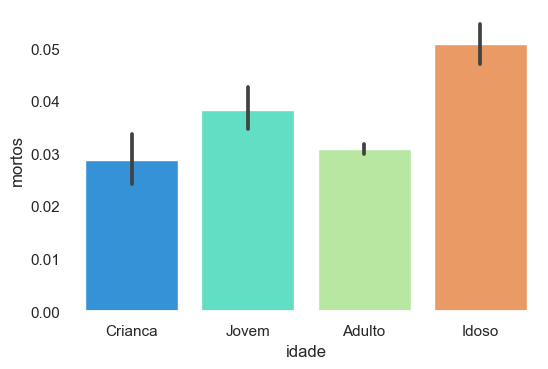

In [103]:
sns.barplot(x='idade', y='mortos', data=dados, palette='rainbow');

In [104]:
pd.crosstab(dados['causa_acidente'],dados['mortos'])

mortos                                                  0     1
causa_acidente                                                 
Agressão Externa                                      812    18
Animais na Pista                                     2761    90
Avarias e/ou desgaste excessivo no pneu              1653    33
Carga excessiva e/ou mal acondicionada                474    18
Condutor Dormindo                                    5271   311
Defeito Mecânico no Veículo                          7136   116
Defeito na Via                                       1913    47
Deficiência ou não Acionamento do Sistema de Il...    441    27
Desobediência às normas de trânsito pelo condutor   21395   844
Desobediência às normas de trânsito pelo pedestre     833   137
Falta de Atenção do Pedestre                         4063   588
Falta de Atenção à Condução                         59408  1264
Fenômenos da Natureza                                 437    12
Ingestão de Substâncias Psicoativas                   202    10
Ingestão de Álcool                                  12322   324
Ingestão de álcool e/ou substâncias psicoativas...    857    29
Mal Súbito                                           1284   100
Não guardar distância de segurança                  12101   105
Objeto estático sobre o leito carroçável             1002    19
Pista Escorregadia                                   4430   105
Restrição de Visibilidade                            1228    79
Sinalização da via insuficiente ou inadequada         651    28
Ultrapassagem Indevida                               3597   328
Velocidade Incompatível                             12669   701

In [105]:
# Média de mortos com base na causa do acidente

dados[['causa_acidente','mortos']].groupby(['causa_acidente'], as_index = False).mean().sort_values(by='mortos',ascending=False)

causa_acidente    mortos
9   Desobediência às normas de trânsito pelo pedestre  0.141237
10                       Falta de Atenção do Pedestre  0.126424
22                             Ultrapassagem Indevida  0.083567
16                                         Mal Súbito  0.072254
20                          Restrição de Visibilidade  0.060444
7   Deficiência ou não Acionamento do Sistema de I...  0.057692
4                                   Condutor Dormindo  0.055715
23                            Velocidade Incompatível  0.052431
13                Ingestão de Substâncias Psicoativas  0.047170
21      Sinalização da via insuficiente ou inadequada  0.041237
8   Desobediência às normas de trânsito pelo condutor  0.037951
3              Carga excessiva e/ou mal acondicionada  0.036585
15  Ingestão de álcool e/ou substâncias psicoativa...  0.032731
1                                    Animais na Pista  0.031568
12                              Fenômenos da Natureza  0.026726
14                                 Ingestão de Álcool  0.025621
6                                      Defeito na Via  0.023980
19                                 Pista Escorregadia  0.023153
0                                    Agressão Externa  0.021687
11                        Falta de Atenção à Condução  0.020833
2             Avarias e/ou desgaste excessivo no pneu  0.019573
18           Objeto estático sobre o leito carroçável  0.018609
5                         Defeito Mecânico no Veículo  0.015996
17                 Não guardar distância de segurança  0.008602

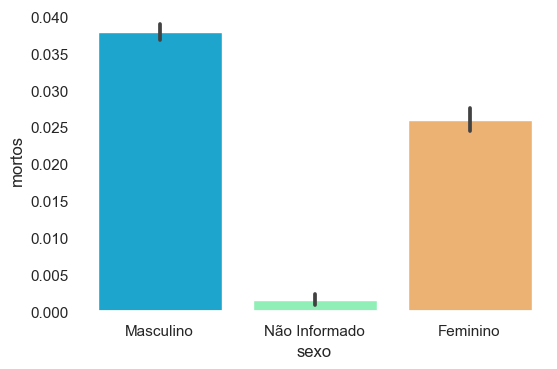

In [106]:
sns.barplot(x='sexo', y='mortos', data=dados, palette='rainbow');

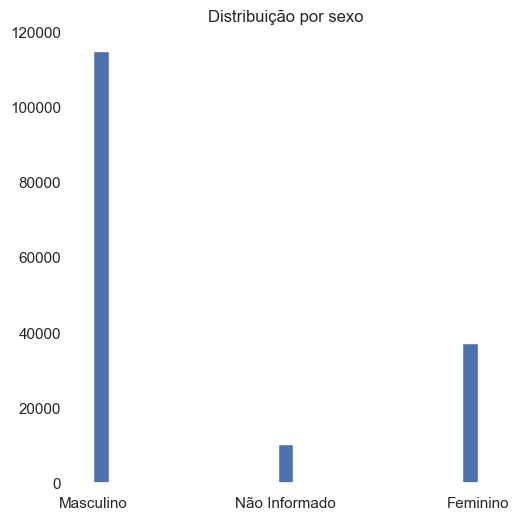

In [107]:
# Distribuição por sexo
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
fig = dados.sexo.hist(bins=25)
fig.set_title('Distribuição por sexo');

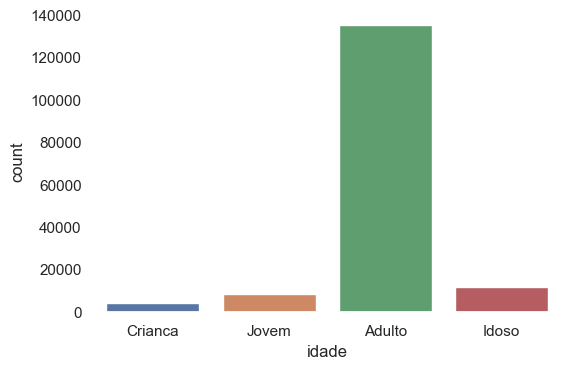

In [108]:
#Qual é a idade predominante
sns.countplot(dados.idade);

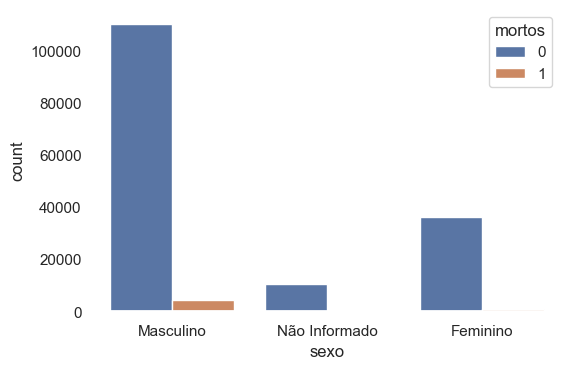

In [109]:
sns.countplot('sexo', hue='mortos', data=dados);

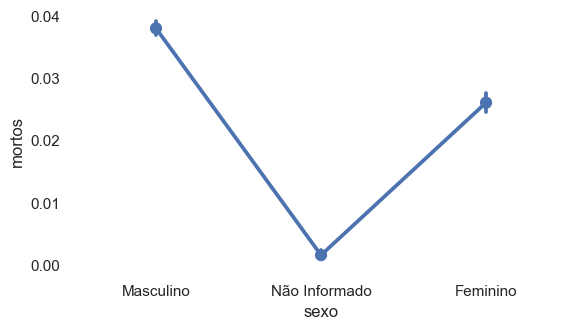

In [110]:
sns.catplot('sexo', 'mortos', data=dados, kind='point')
fig=plt.gcf()
fig.set_size_inches(6,3)

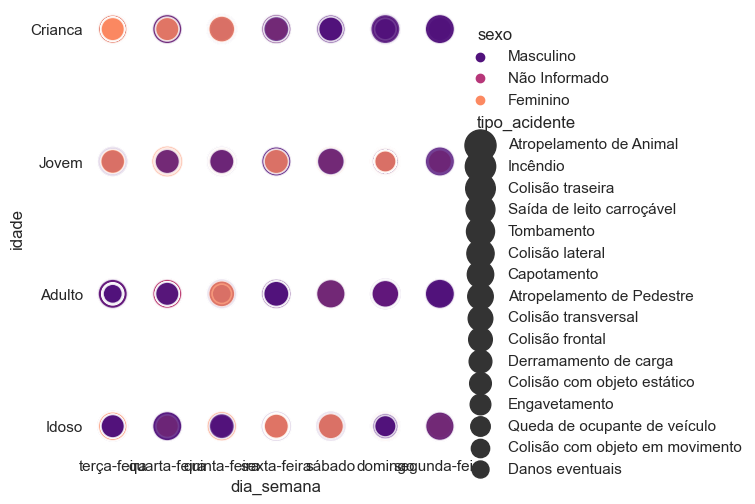

In [111]:
sns.relplot(x='dia_semana', y='idade', hue='sexo', data=dados, size='tipo_acidente', sizes=(150,500),
           alpha=0.8, palette='magma')
plt.show()

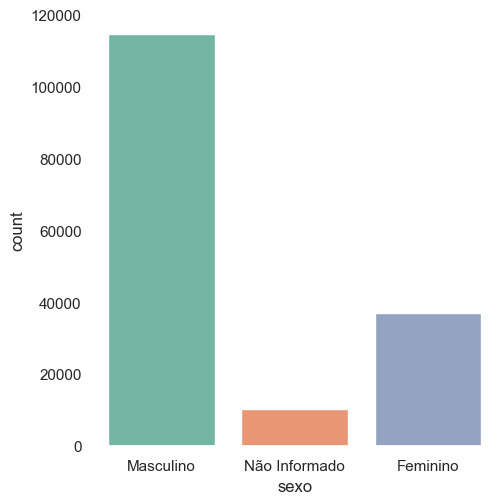

In [113]:
sns.catplot(x="sexo", kind="count", palette="Set2", data=dados);

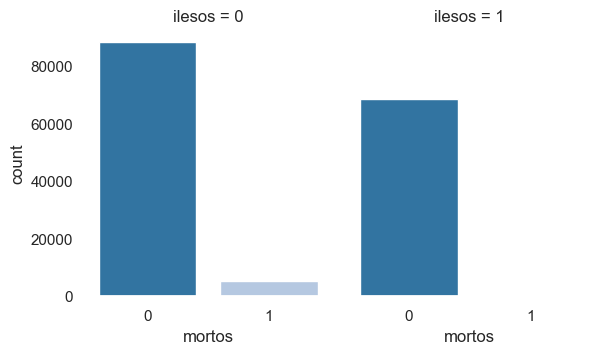

In [114]:
sns.catplot('mortos', col='ilesos', data=dados[['mortos', 'ilesos']].dropna(),
           kind='count', height=3.5, aspect=0.8, col_wrap=4, palette='tab20')

plt.show()

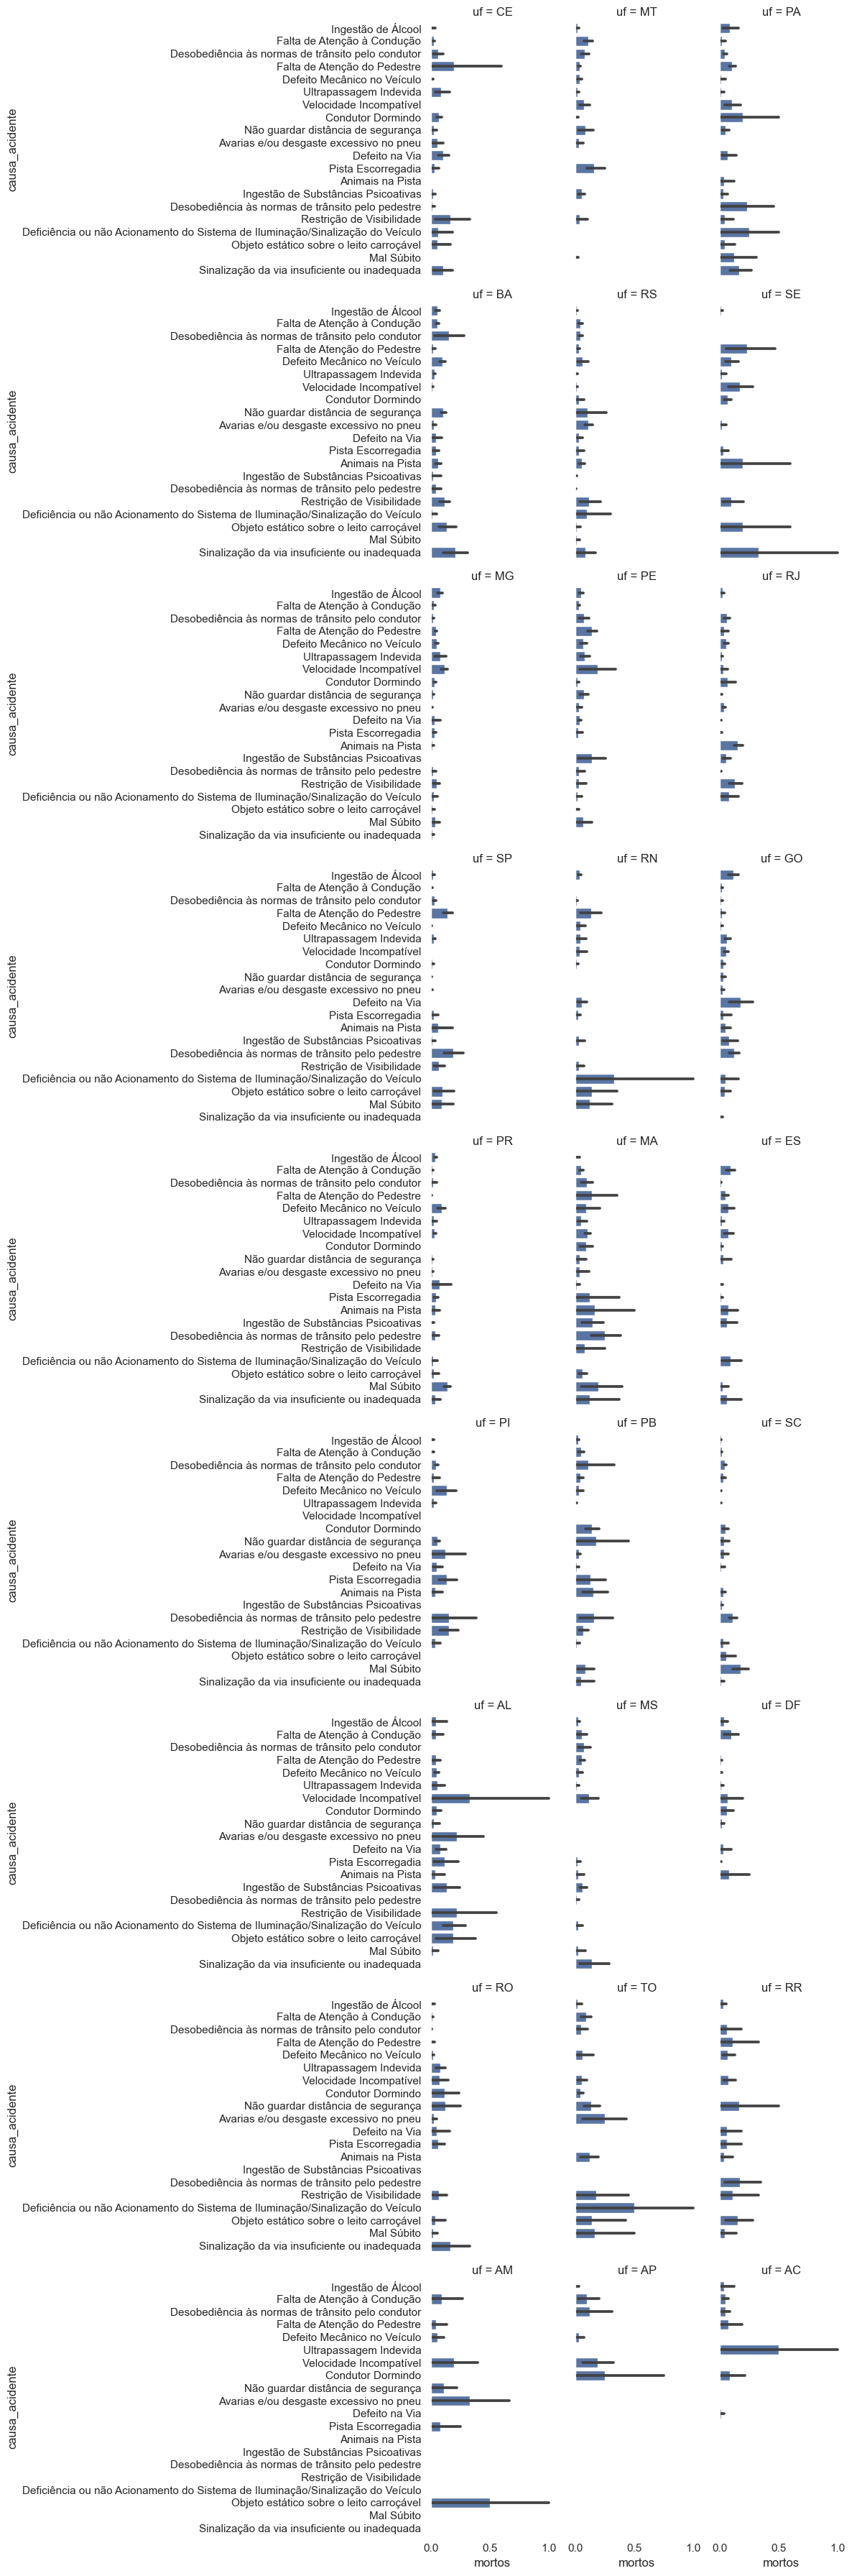

In [115]:
ax = sns.FacetGrid(dados, col="uf", col_wrap = 3, height = 4)
ax.map(sns.barplot, "mortos", "causa_acidente");

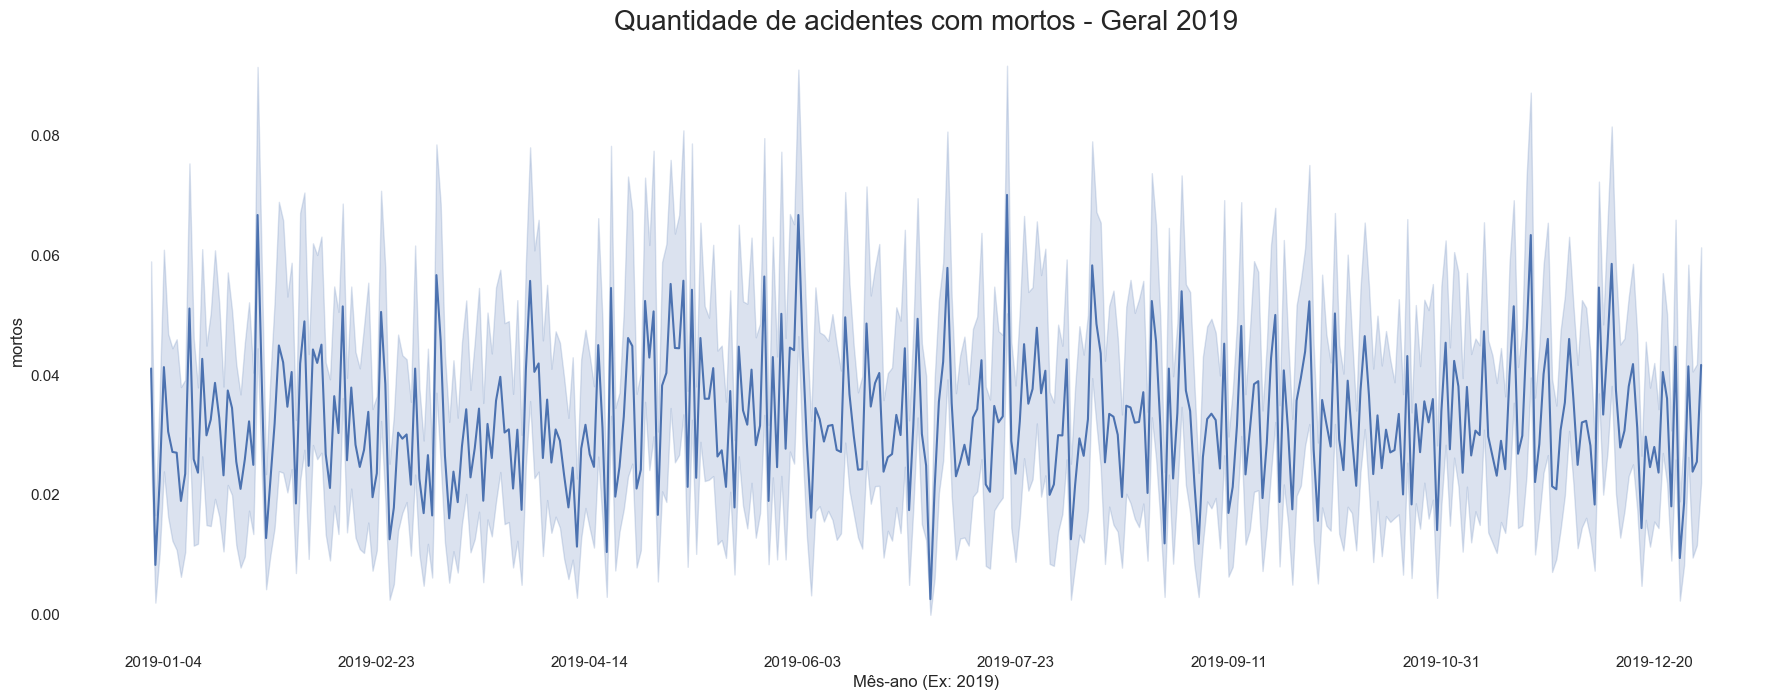

In [122]:
ax = sns.lineplot(x = 'mortos', y = 'mortos', data = dados)
ax.figure.set_size_inches(22,8)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_title("Quantidade de acidentes com mortos - Geral 2019", fontsize=20)
ax.set_xlabel('Mês-ano (Ex: 2019)');

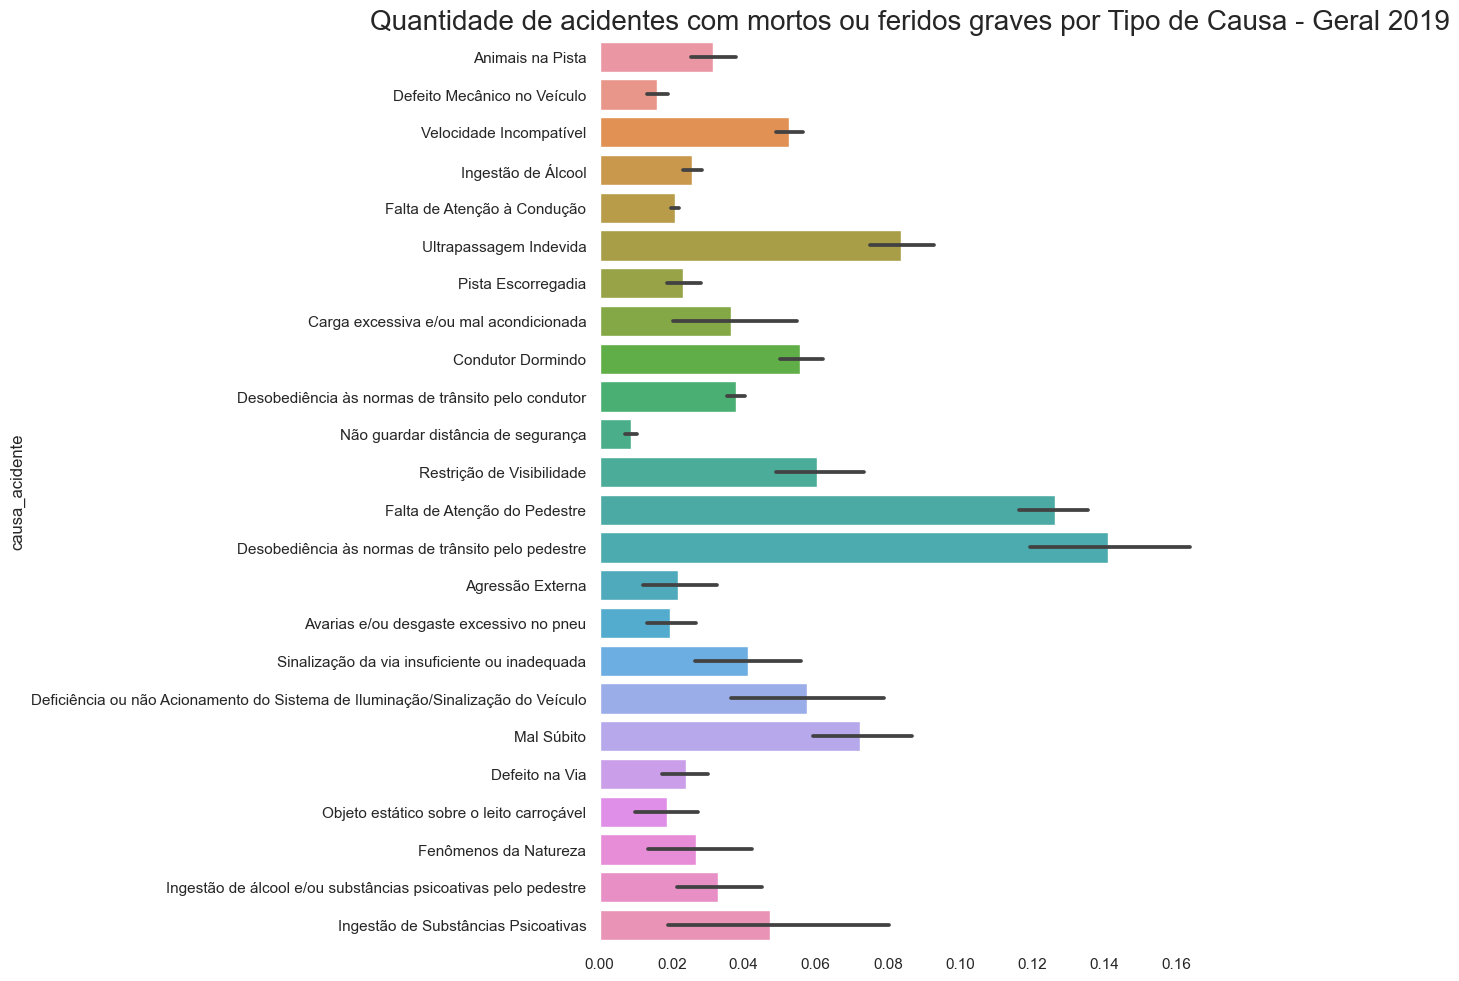

In [127]:
ax = sns.barplot(x="mortos", y="causa_acidente", data=dados)
ax.set_title("Quantidade de acidentes com mortos ou feridos graves por Tipo de Causa - Geral 2019", fontsize=20)
ax.set_xlabel('')
ax.figure.set_size_inches(8,12);

In [128]:
# Salvando o Dataframe:
dados.to_csv('Acidentes.csv', sep=';', index=False)